In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
import pickle
from pylab import rcParams

rs = 810

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/신용카드/creditcard.csv", delimiter=',', dtype=np.float32)

print(df.shape, '\n')
print(df.head())

(284807, 31) 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18      

# EDA


In [ ]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

In [ ]:
print(df.describe())

                Time            V1             V2            V3            V4  \
count  284807.000000  2.848070e+05  284807.000000  2.848070e+05  2.848070e+05   
mean    94813.867188  1.339397e-08       0.000000 -4.800400e-08  6.643411e-09   
std     47487.195312  1.958611e+00       1.651183  1.516203e+00  1.415832e+00   
min         0.000000 -5.640751e+01     -72.715729 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01      -0.598550 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02       0.065486  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00       0.803724  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00      22.057730  9.382559e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.657364e-08 -1.500125e-09 -1.071518e-09 -1.071518e-10 -3.214554e-10   
std    1.380180e+00  1.332214e+00

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum() / data.isnull().count() * 100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)

    tt['Types'] = types
    return(np.transpose(tt))

missing_data(df)

# 결측치는 존재하지 않음

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32


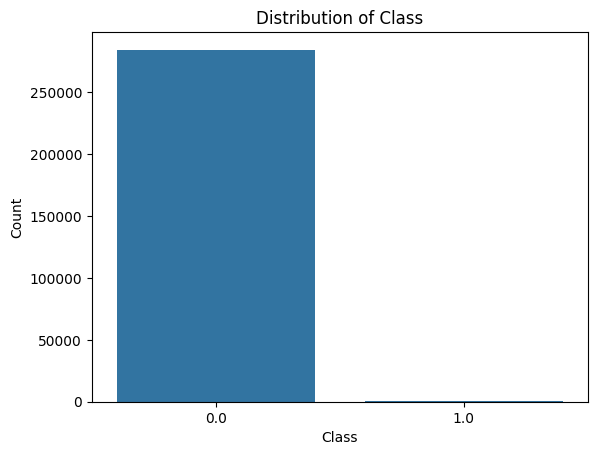

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Distribution of Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
print(df["Class"].value_counts())
#count_classes = pd.value_counts(df["Class"], sort=True)
#count_classes.head()
# print(df["Class"].value_counts(normalize=True))

print()
print('No Frauds', round(df['Class'].value_counts()[0]/len(df['Class']) * 100,2),
      '% of the DataSet')
print('Frauds', round(df['Class'].value_counts()[1]/len(df['Class']) * 100,2),
      '% of the DataSet')

# 데이터의 불균형이 매우 심함
# 대부분의 거래가 정상 거래 (No Frauds)
# 이러한 데이터를 예측 모델과 분석의 기반으로 사용하면, 많은 오류가 발생할 수 있으며, 알고리즘이 과적합될 가능성이 높음
# 모델이 대부분의 거래가 정상이라고 가정하는 것을 원치 않음
# 모델이 사기의 신호를 감지하는 패턴을 찾아내기를 원함

Class
0.0    284315
1.0       492
Name: count, dtype: int64

No Frauds 99.83 % of the DataSet
Frauds 0.17 % of the DataSet


<ipython-input-10-b9705670b0c7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-10-b9705670b0c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


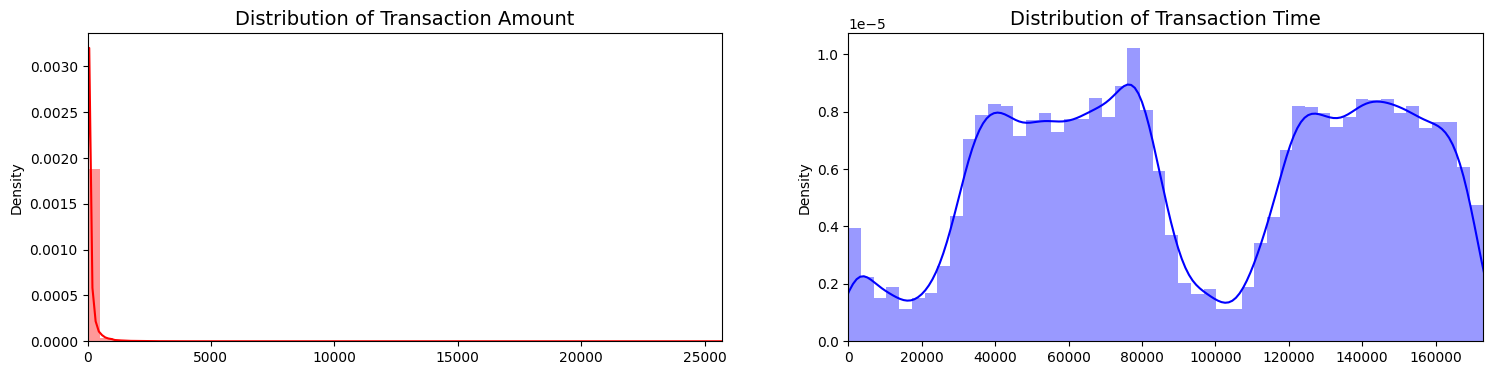

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [ ]:
df.duplicated(keep=False).sum()

1854

In [ ]:
df.duplicated(keep='first').sum()

1081

In [ ]:
df_duplicated_all = df[df.duplicated(keep=False)]
df_duplicated_keep = df[df.duplicated(keep='first')]
num_df_duplicated_c1 = df_duplicated_keep[df_duplicated_keep["Class"]==1].shape[0]
num_df_duplicated_c0 = df_duplicated_keep[df_duplicated_keep["Class"]==0].shape[0]

print(f"중복 행 중 이상거래(Class 1) 건수는 {num_df_duplicated_c1}건, 정상거래 수는 {num_df_duplicated_c0}건")

중복 행 중 이상거래(Class 1) 건수는 19건, 정상거래 수는 1062건


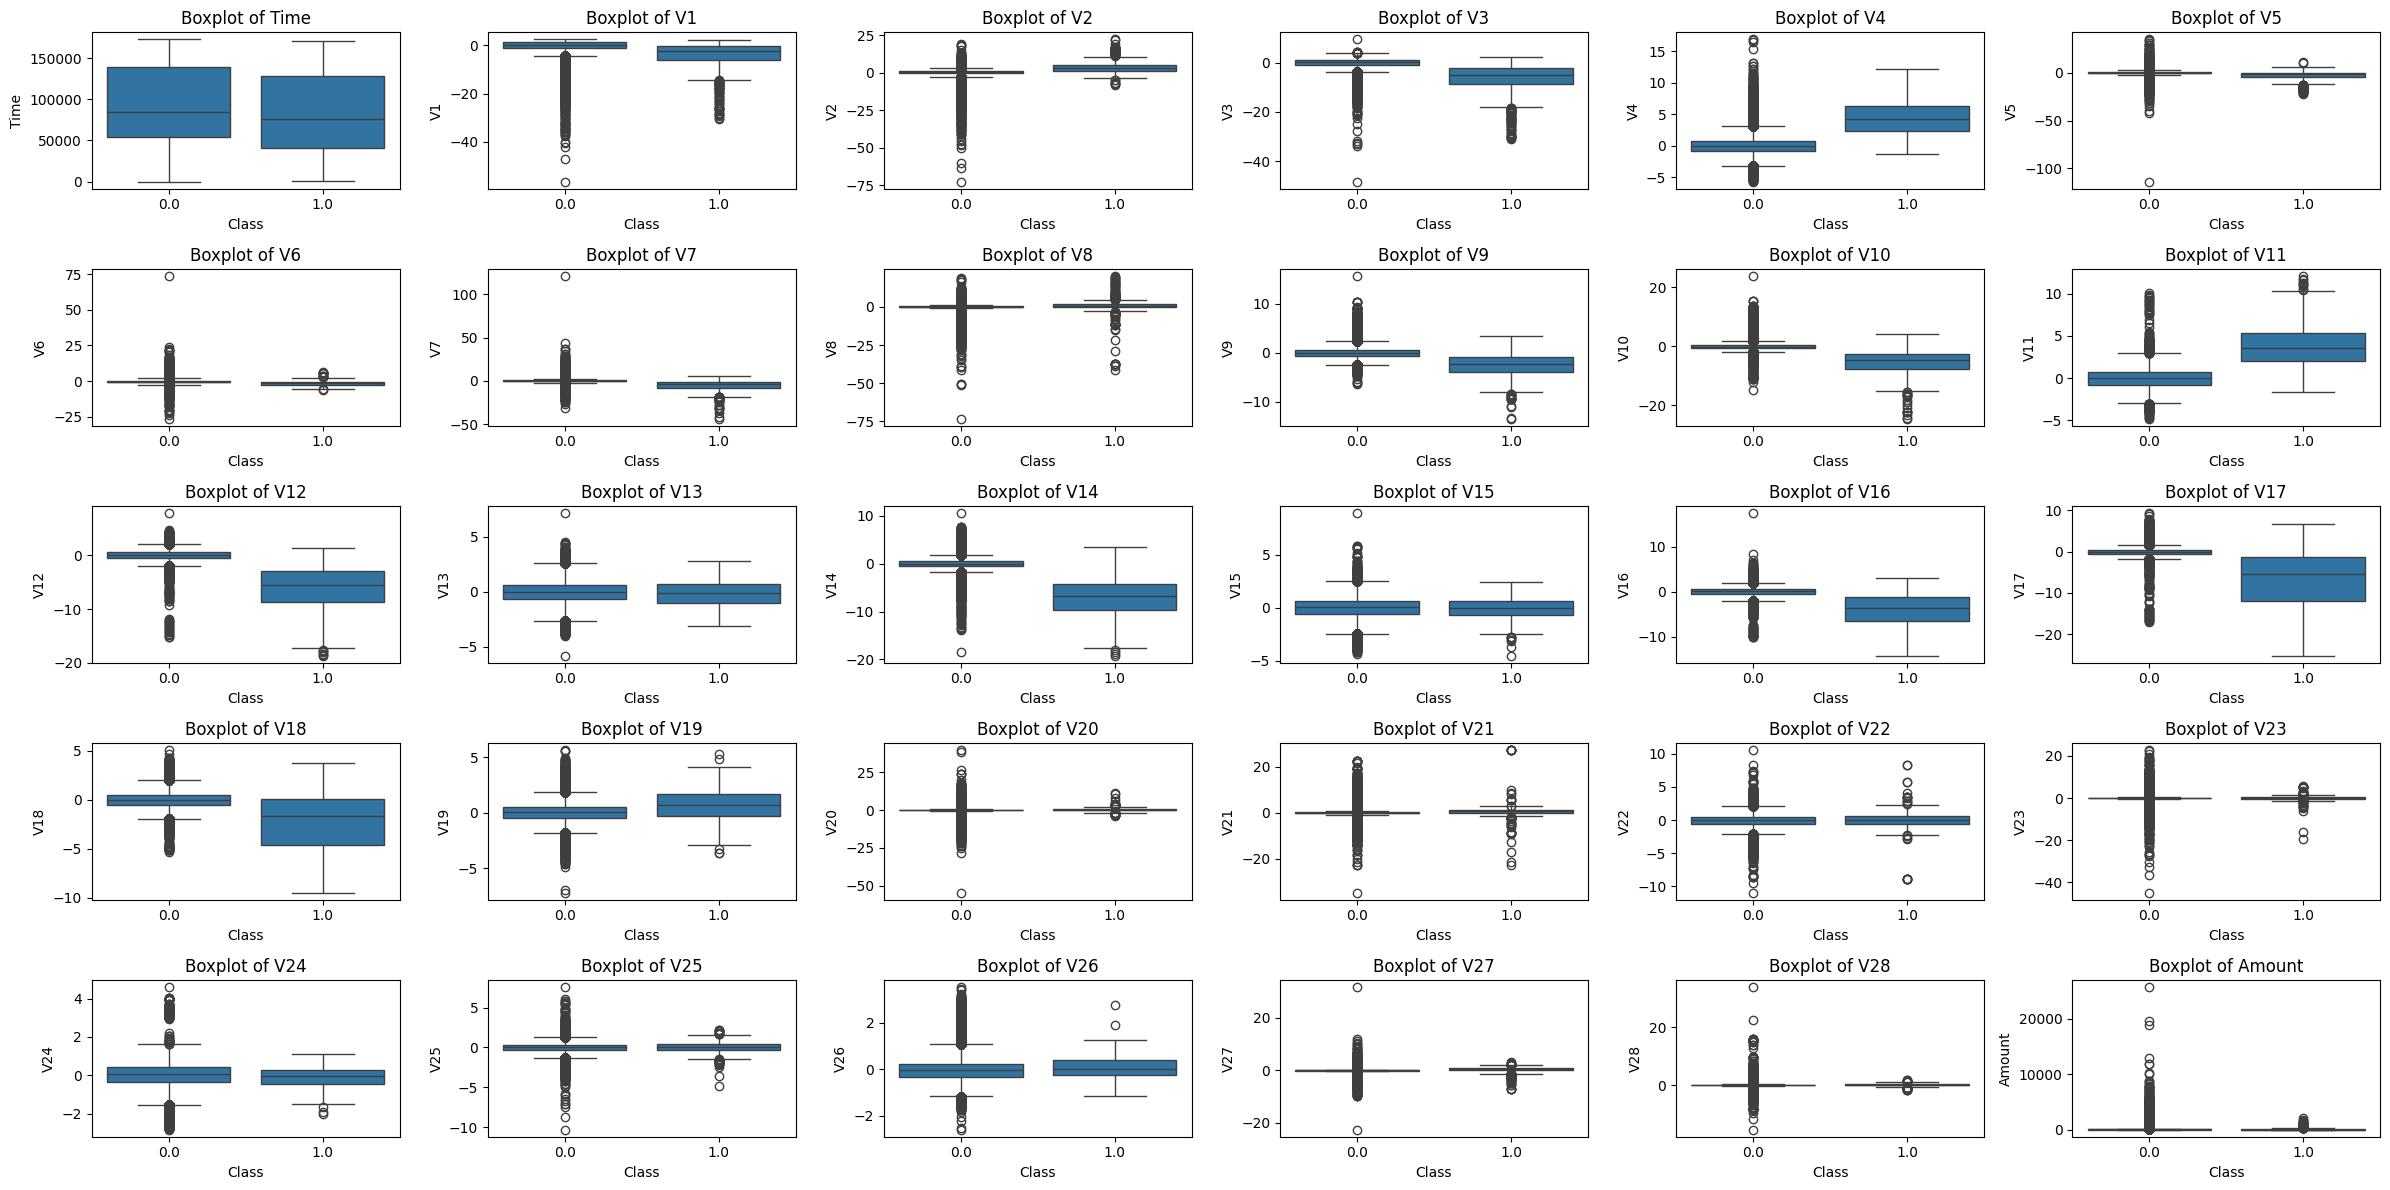

In [ ]:
# Class 값 별 이상치 확인
def draw_boxplots(data, variables, class_column, rows, cols, figsize=(24,12)):
    plt.figure(figsize=figsize)
    for i, variable in enumerate(variables, start=1):
        plt.subplot(rows, cols, i)
        sns.boxplot(x=class_column, y=variable, data=data)
        plt.title(f'Boxplot of {variable}')
    plt.tight_layout()
    plt.show()


# 결과
features = df.columns.values[:-1]
draw_boxplots(data=df, variables=features, class_column='Class', rows=5, cols=6)

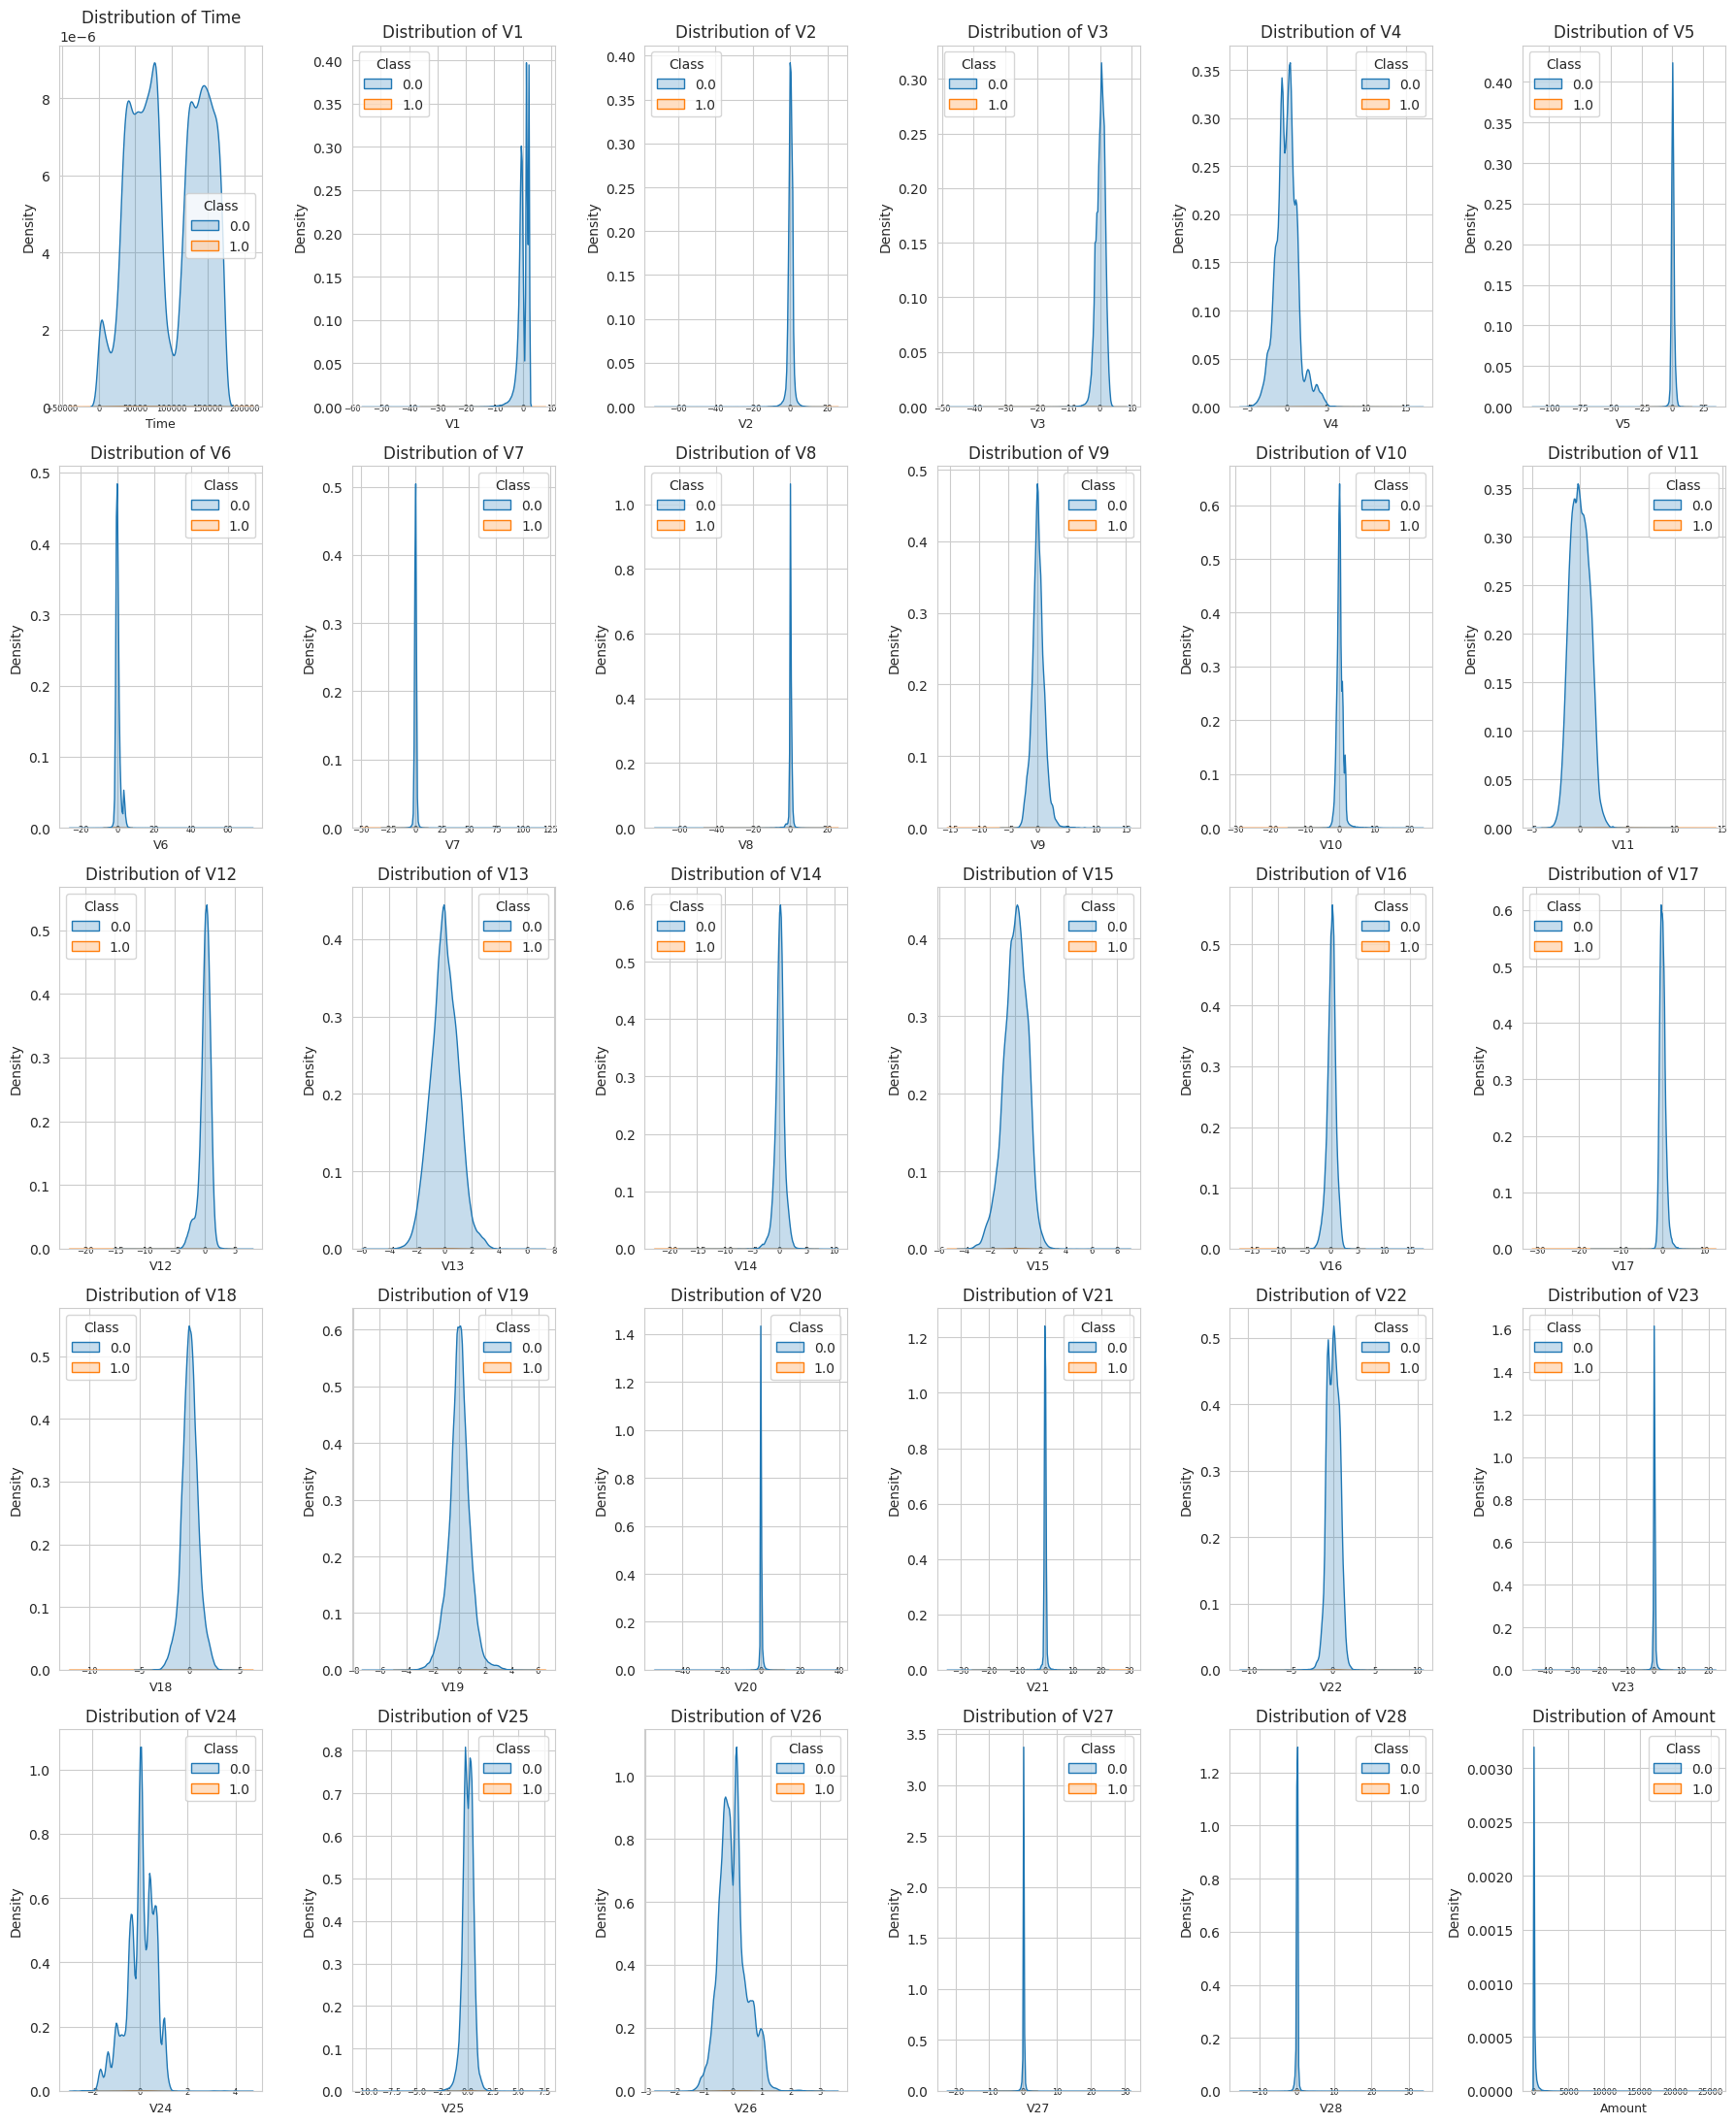

In [ ]:
def features_distribution (df, label, features):
    i = 0
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(5, 6, figsize=(18, 22))

    for feature in features:
        i+= 1
        plt.subplot(5, 6, i)

        sns.kdeplot(data=df, x=feature, hue='Class', fill=True)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)

    plt.tight_layout()
    plt.show()

features = df.columns.values[:-1]
features_distribution(df=df, label='Class', features=features)

In [ ]:
print("======Class=1 인 Time 컬럼의 통계량======\n", df.Time[df.Class == 1].describe())
print("\n\n======Class=0 인 Time 컬럼의 통계량======\n", df.Time[df.Class == 0].describe())

======Class=1 인 Time 컬럼의 통계량======
 count       492.000000
mean      80746.804688
std       47835.363281
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


======Class=0 인 Time 컬럼의 통계량======
 count    284315.000000
mean      94838.195312
std       47483.007812
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


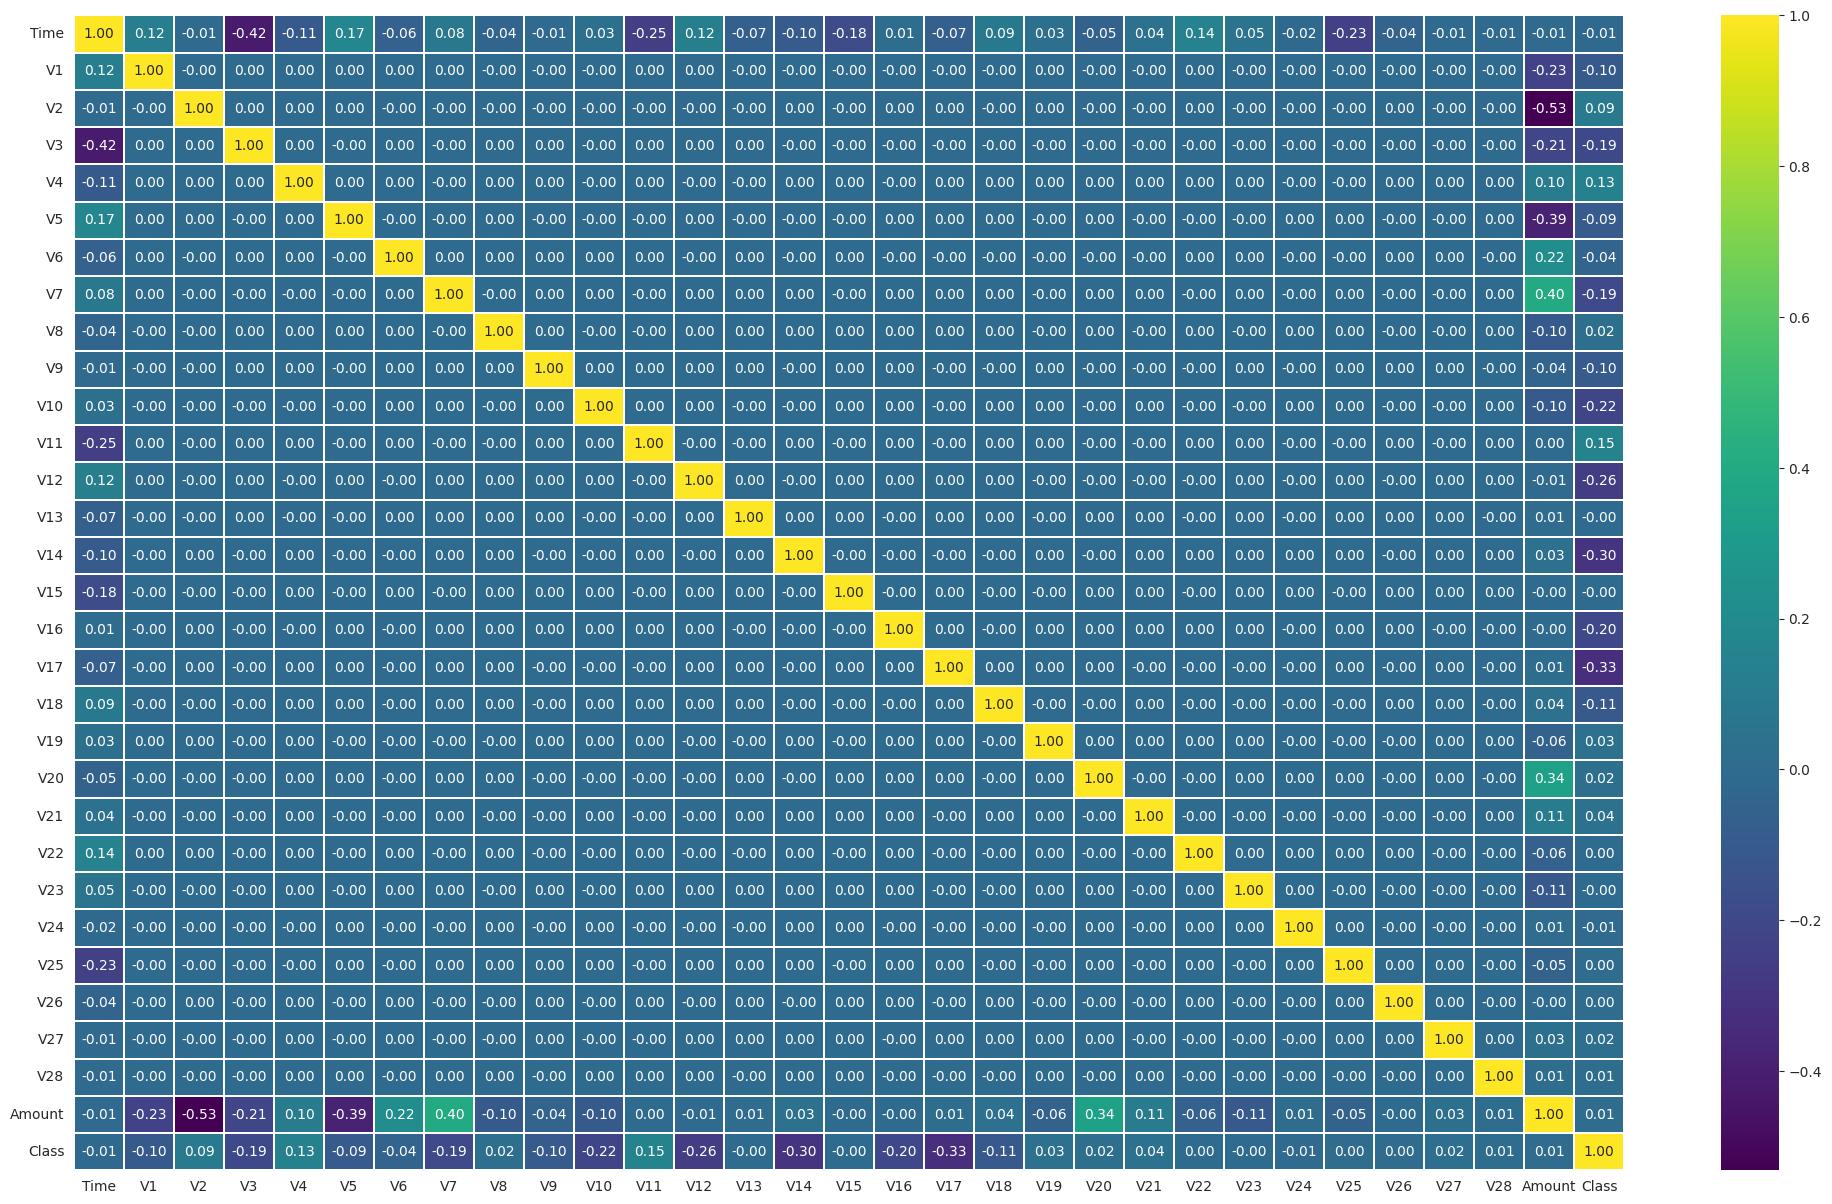

In [ ]:
#변수간 상관관계
f, ax = plt.subplots(figsize = (25,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.3, fmt="0.2f", ax=ax, cmap="viridis")
plt.show()

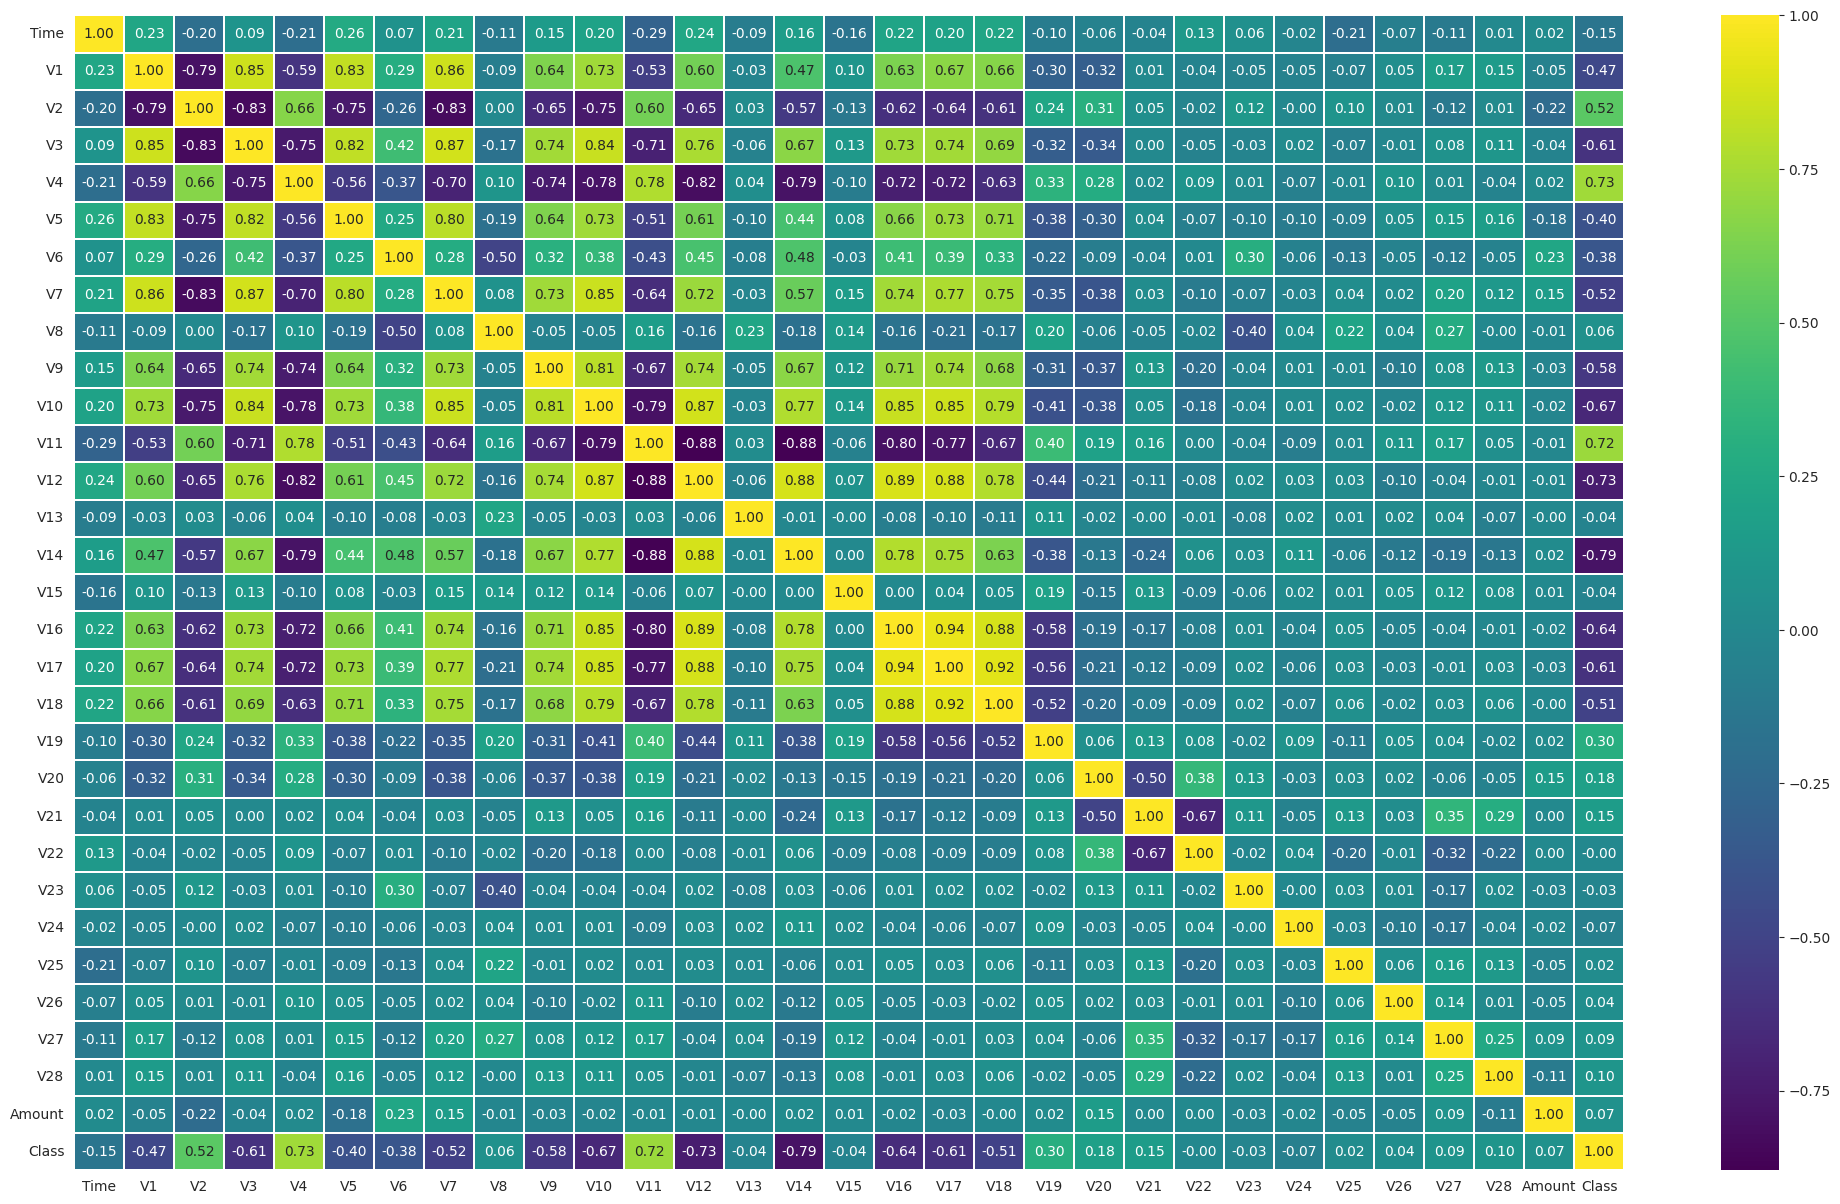

In [ ]:
non_fraud = df[df['Class'] == 0].sample(1000)
fraud = df[df['Class'] == 1]

df_c1 = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)

f, ax = plt.subplots(figsize = (25,15))
sns.heatmap(df_c1.corr(), annot=True, linewidths=0.3, fmt="0.2f", ax=ax, cmap="viridis")
plt.show()

# 상관관계가 높은 변수들은 보이지 않음

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Function to calculate VIF for multicollinearity check.
feature_df = df.drop(columns=['Time','Class'])

vif_data = pd.DataFrame()
vif_data["feature"] = feature_df.columns
vif_data["VIF"] = [variance_inflation_factor(feature_df.values, i) for i in range(feature_df.shape[1])]

# Display VIF for each independent variables.
vif_data

# Amount와의 다중공산성이 조금 높지만 10 이하이기에 그대로 두고 진

,feature,VIF
0,V1,1.250117
1,V2,2.362199
2,V3,1.214515
3,V4,1.047022
4,V5,1.720044
5,V6,1.225016
6,V7,1.761456
7,V8,1.051253
8,V9,1.009443
9,V10,1.049697


# 데이터분할 및 스케일링

In [ ]:
# 대부분의 데이터가 이미 스케일링 되어 있음. 남은 열 'Amount' 와 'Time' 을 스케일링 해야함.
from sklearn.preprocessing import StandardScaler, RobustScaler


# RobustScaler는 이상치에 덜 민감해서 사용하기로 함.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount, Time 스케일링 진행


df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain_full, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain_full, original_ytest = y.iloc[train_index], y.iloc[test_index]

    original_Xtrain, original_Xval, original_ytrain, original_yval = train_test_split(
        original_Xtrain_full, original_ytrain_full, test_size=0.2, stratify=original_ytrain_full, random_state=rs
    )

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
# original_Xval = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values
# original_yval= original_ytrain.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
val_unique_label, val_counts_label = np.unique(original_yval, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(val_counts_label/ len(original_yval))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [     0      1      2 ... 284804 284805 284806] Test: [    10     15     17 ... 284799 284801 284802]
Train: [     0      1      2 ... 284802 284804 284806] Test: [    16     23     29 ... 284782 284803 284805]
Train: [     0      2      3 ... 284803 284804 284805] Test: [     1      5      6 ... 284798 284800 284806]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     3      8     18 ... 284791 284792 284796]
Train: [     1      3      5 ... 284803 284805 284806] Test: [     0      2      4 ... 284795 284797 284804]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827185 0.00172815]
[0.9982664 0.0017336]
[0.99827952 0.00172048]


# 모델 탐색

In [ ]:
# Function for saving metric data to df and displaying the df
# 모델별 성능 저장

model_eval = pd.DataFrame({
    'model' : [''],
    'acc_test' : [0],
    'precision_test' : [0],
    'recall_test' : [0],
    'f1_score_test' : [0]
})

def add_model_eval(model, acc_test, precision_test, recall_test, f1_score_test):

    model_eval['model'] = model
    model_eval['acc_test'] = f'{acc_test: .2f}'
    model_eval['precision_test'] =  f'{precision_test: .2f}'
    model_eval['recall_test'] = f'{recall_test: .2f}'
    model_eval['f1_score_test'] = f'{f1_score_test: .2f}'
    return model_eval

def view_models_eval(df_results):
    df_results = pd.concat([df_results, model_eval], axis=0)
    df_results = df_results.sort_values(by=['recall_test'], ascending=False).reset_index(drop=True)  # recall을 기준으로 내림차순 정렬
    return df_results

In [ ]:
# Create dataframe
df_metrics_table = pd.DataFrame()

# 로지스틱

In [ ]:
from sklearn.linear_model import LogisticRegression


LR_model = LogisticRegression(random_state=rs)
lr_model = LR_model.fit(original_Xtrain, original_ytrain)

lr_pred = lr_model.predict(original_Xtest)

In [ ]:
# Scores
import sklearn.metrics as metrics

lr_acc_test = metrics.accuracy_score(original_ytest, lr_pred)
lr_precision_test = metrics.precision_score(original_ytest, lr_pred)
lr_recall_test = metrics.recall_score(original_ytest, lr_pred)
lr_f1_test = metrics.f1_score(original_ytest,lr_pred)

print("Accuracy Logit:", metrics.accuracy_score(original_ytest, lr_pred))
print("Precision Logit:", metrics.precision_score(original_ytest, lr_pred))
print("Recall Logit:", metrics.recall_score(original_ytest, lr_pred))
print("F1 Score Logit:", metrics.f1_score(original_ytest, lr_pred))

add_model_eval('Logistic Regression',lr_acc_test, lr_precision_test, lr_recall_test, lr_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy Logit: 0.999350432752234
Precision Logit: 0.8860759493670886
Recall Logit: 0.7142857142857143
F1 Score Logit: 0.7909604519774012


,model,acc_test,precision_test,recall_test,f1_score_test
0,Logistic Regression,1.00,0.89,0.71,0.79


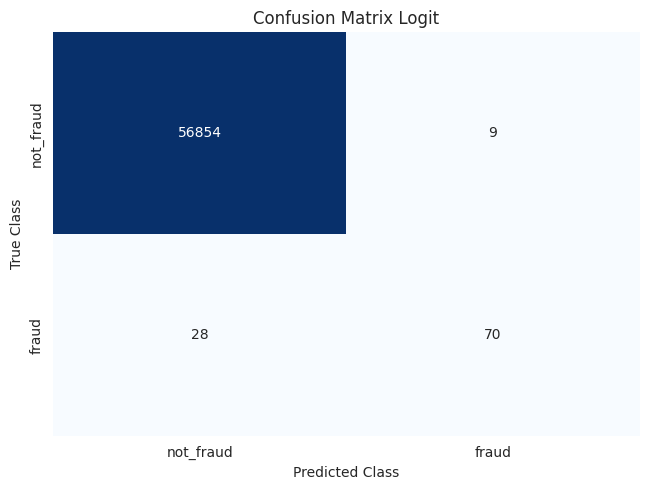

In [ ]:
# Confusion Matrix
matrix_logit_under = confusion_matrix((original_ytest), lr_pred)
cm_lr_under = pd.DataFrame(matrix_logit_under, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_lr_under, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_logit_proba = LR_model.predict_proba(original_Xtest)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(original_ytest,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(original_ytest, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.9715020383758026


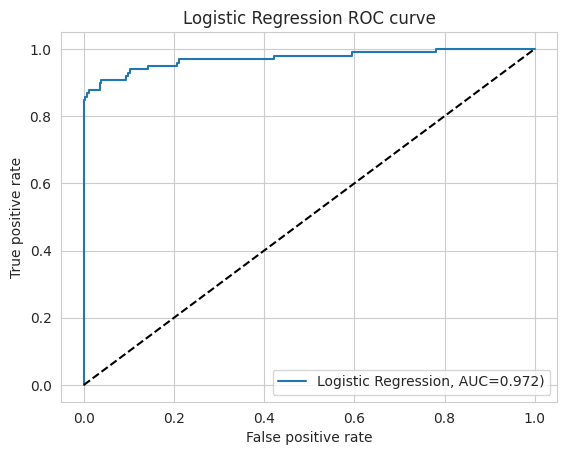

In [ ]:
# ROC
plt.plot(fpr_logit, tpr_logit, label=f"Logistic Regression, AUC={auc_logit:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC

SVC_model = SVC(probability=True, random_state=rs)
svm = SVC_model.fit(original_Xtrain, original_ytrain)
svm_pred = SVC_model.predict(original_Xtest)

In [ ]:
# Scores
svm_acc_test = metrics.accuracy_score(original_ytest,svm_pred)
svm_precision_test = metrics.precision_score(original_ytest, svm_pred)
svm_recall_test = metrics.recall_score(original_ytest, svm_pred)
svm_f1_test = metrics.f1_score(original_ytest, svm_pred)

print("Accuracy SVM:",metrics.accuracy_score(original_ytest, svm_pred))
print("Precision SVM:",metrics.precision_score(original_ytest, svm_pred))
print("Recall SVM:",metrics.recall_score(original_ytest, svm_pred))
print("F1 Score SVM:",metrics.f1_score(original_ytest,svm_pred))

add_model_eval('SVM',svm_acc_test, svm_precision_test, svm_recall_test, svm_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy SVM: 0.999350432752234
Precision SVM: 0.9178082191780822
Recall SVM: 0.6836734693877551
F1 Score SVM: 0.783625730994152


,model,acc_test,precision_test,recall_test,f1_score_test
0,Logistic Regression,1.00,0.89,0.71,0.79
1,SVM,1.00,0.92,0.68,0.78


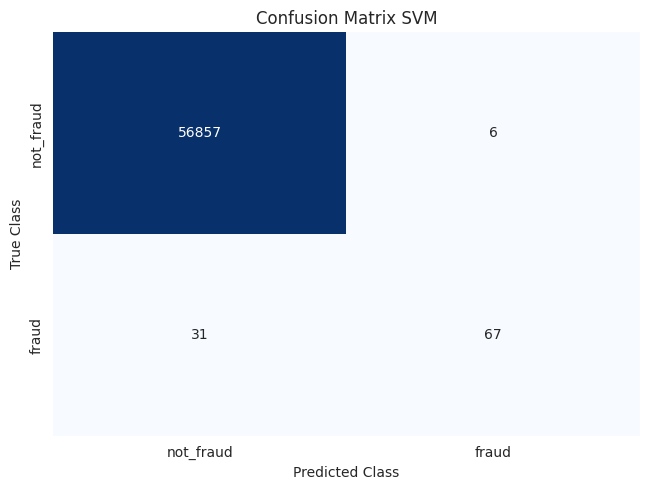

In [ ]:
# CM matrix
matrix_svm = confusion_matrix(original_ytest,svm_pred)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_svm_proba = SVC_model.predict_proba(original_Xtest)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(original_ytest, y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(original_ytest, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.9437216984467143


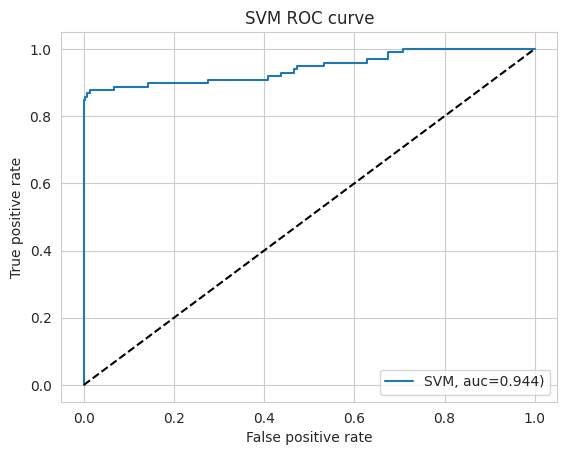

In [ ]:
# ROC
plt.plot(fpr_svm,tpr_svm,label=f"SVM, auc={auc_svm:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

# 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier(n_estimators=100, oob_score=False)
Rf_model.fit(original_Xtrain, original_ytrain)

RandomForestClassifier()

In [ ]:
y_pred_rf = Rf_model.predict(original_Xtest)

In [ ]:
# Scores
rf_acc_test = metrics.accuracy_score(original_ytest, y_pred_rf)
rf_precision_test = metrics.precision_score(original_ytest, y_pred_rf)
rf_recall_test = metrics.recall_score(original_ytest, y_pred_rf)
rf_f1_test = metrics.f1_score(original_ytest, y_pred_rf)

print("Accuracy RF:",metrics.accuracy_score(original_ytest, y_pred_rf))
print("Precision RF:",metrics.precision_score(original_ytest, y_pred_rf))
print("Recall RF:",metrics.recall_score(original_ytest, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(original_ytest, y_pred_rf))

add_model_eval('Random Forest',rf_acc_test, rf_precision_test, rf_recall_test, rf_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy RF: 0.9995786590825302
Precision RF: 0.9404761904761905
Recall RF: 0.8061224489795918
F1 Score RF: 0.8681318681318682


,model,acc_test,precision_test,recall_test,f1_score_test
0,Random Forest,1.00,0.94,0.81,0.87
1,Logistic Regression,1.00,0.89,0.71,0.79
2,SVM,1.00,0.92,0.68,0.78


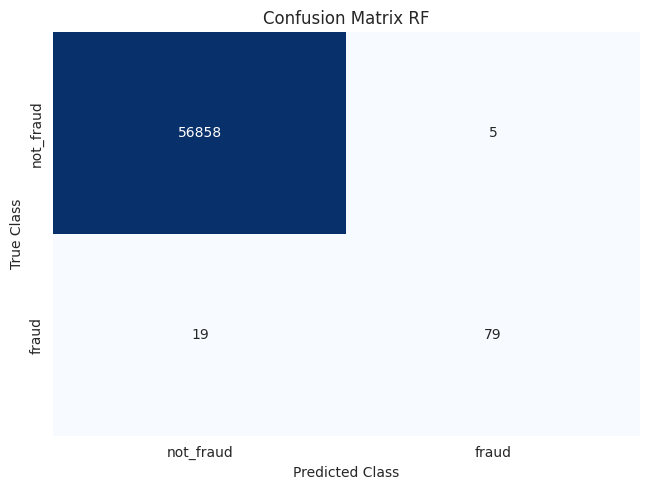

In [ ]:
# CM matrix
matrix_rf = confusion_matrix(original_ytest, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_rf_proba = Rf_model.predict_proba(original_Xtest)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(original_ytest, y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(original_ytest, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9472350658779948


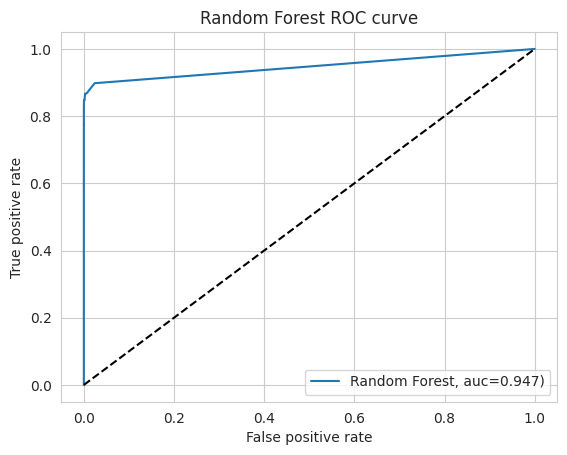

In [ ]:
# ROC
plt.plot(fpr_rf,tpr_rf,label=f"Random Forest, auc={auc_rf:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

# Xgboost

In [ ]:
from xgboost import XGBClassifier

Xgboost_model = XGBClassifier(eval_metric='aucpr')
Xgboost_model.fit(original_Xtrain, original_ytrain, eval_set=[(original_Xtest, original_ytest)])

y_pred_xgb = Xgboost_model.predict(original_Xtest)

[0]	validation_0-aucpr:0.76039
[1]	validation_0-aucpr:0.80334
[2]	validation_0-aucpr:0.80907
[3]	validation_0-aucpr:0.80557
[4]	validation_0-aucpr:0.81521
[5]	validation_0-aucpr:0.81641
[6]	validation_0-aucpr:0.81664
[7]	validation_0-aucpr:0.81832
[8]	validation_0-aucpr:0.81947
[9]	validation_0-aucpr:0.81610
[10]	validation_0-aucpr:0.82169
[11]	validation_0-aucpr:0.82122
[12]	validation_0-aucpr:0.82105
[13]	validation_0-aucpr:0.82215
[14]	validation_0-aucpr:0.82325
[15]	validation_0-aucpr:0.82728
[16]	validation_0-aucpr:0.82812
[17]	validation_0-aucpr:0.82778
[18]	validation_0-aucpr:0.83212
[19]	validation_0-aucpr:0.83277
[20]	validation_0-aucpr:0.83191
[21]	validation_0-aucpr:0.83094
[22]	validation_0-aucpr:0.83024
[23]	validation_0-aucpr:0.83007
[24]	validation_0-aucpr:0.82772
[25]	validation_0-aucpr:0.82877
[26]	validation_0-aucpr:0.83032
[27]	validation_0-aucpr:0.83249
[28]	validation_0-aucpr:0.83143
[29]	validation_0-aucpr:0.83221
[30]	validation_0-aucpr:0.83204
[31]	validation_0-

In [ ]:
# Scores
xgb_acc_test = metrics.accuracy_score(original_ytest, y_pred_xgb)
xgb_precision_test = metrics.precision_score(original_ytest, y_pred_xgb)
xgb_recall_test = metrics.recall_score(original_ytest, y_pred_xgb)
xgb_f1_test = metrics.f1_score(original_ytest, y_pred_xgb)

print('XGboost Classifier')
print("Accuracy XGB:",metrics.accuracy_score(original_ytest, y_pred_xgb))
print("Precision XGB:",metrics.precision_score(original_ytest, y_pred_xgb))
print("Recall XGB:",metrics.recall_score(original_ytest, y_pred_xgb))
print("F1 Score XGB:",metrics.f1_score(original_ytest, y_pred_xgb))

add_model_eval('XGBoost',xgb_acc_test, xgb_precision_test, xgb_recall_test, xgb_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

XGboost Classifier
Accuracy XGB: 0.9995962149540913
Precision XGB: 0.9518072289156626
Recall XGB: 0.8061224489795918
F1 Score XGB: 0.8729281767955801


,model,acc_test,precision_test,recall_test,f1_score_test
0,MLP,1.00,0.87,0.83,0.85
1,LightGBM,1.00,0.94,0.82,0.87
2,ANN,1.00,0.80,0.82,0.81
3,ANN,1.00,0.80,0.82,0.81
4,LightGBM,1.00,0.94,0.82,0.87
5,Random Forest,1.00,0.94,0.81,0.87
6,XGBoost,1.00,0.95,0.81,0.87
7,XGBoost,1.00,0.95,0.81,0.87
8,Decision tree,1.00,0.80,0.78,0.79
9,AdaBoost,1.00,0.84,0.78,0.80


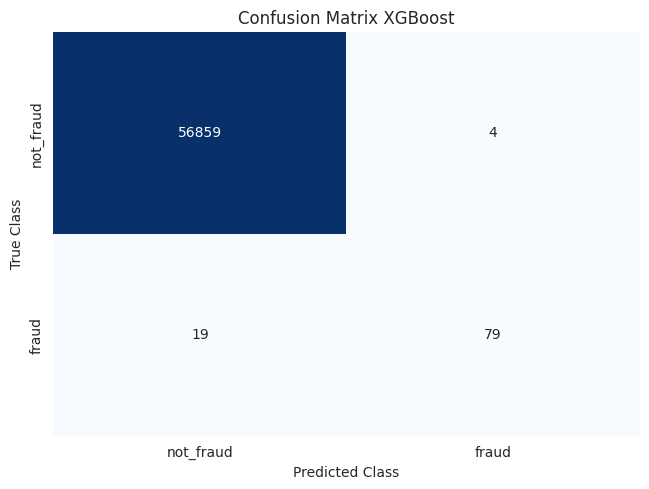

In [ ]:
# CM matrix
matrix_xgb = confusion_matrix(original_ytest, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_xgb_proba = Xgboost_model.predict_proba(original_Xtest)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(original_ytest,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(original_ytest, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

AUC XGBoost : 0.9794620941776636


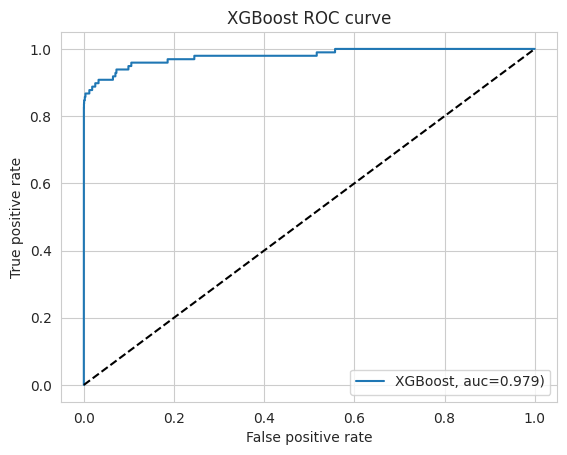

In [ ]:
# ROC
plt.plot(fpr_xgb,tpr_xgb,label=f"XGBoost, auc={auc_xgb:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

# LGBM

In [ ]:
from lightgbm import LGBMClassifier

LGBM_model = LGBMClassifier(n_estimators=1000,          # 트리의 개수 (많을 수록 복잡성 증가)
                        num_leaves=64,              # 각 트리의 최대 leaf node의 개수 (많을 수록 복잡성 증가)
                        n_jobs=-1,                  # 병렬 처리에 사용할 CPU 코어의 개수 (-1일 경우 모든 가능한 CPU 코어 사용)
                        verbosity=-1,               # 학습 중 메세지 출력 정도
                        boost_from_average=False)   # 극도의 클래스 불균형이 있는 경우 True로 지정하면 recall을 매우 저하시킴

LGBM_model.fit(original_Xtrain, original_ytrain)
y_pred_lgbm = LGBM_model.predict(original_Xtest)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Scores
lgbm_acc_test = metrics.accuracy_score(original_ytest, y_pred_lgbm)
lgbm_precision_test = metrics.precision_score(original_ytest, y_pred_lgbm)
lgbm_recall_test = metrics.recall_score(original_ytest, y_pred_lgbm)
lgbm_f1_test = metrics.f1_score(original_ytest, y_pred_lgbm)

print('LightGBM Classifier:')
print("Accuracy LightGBM:",metrics.accuracy_score(original_ytest, y_pred_lgbm))
print("Precision LightGBM:",metrics.precision_score(original_ytest, y_pred_lgbm))
print("Recall LightGBM:",metrics.recall_score(original_ytest, y_pred_lgbm))
print("F1 Score LightGBM:",metrics.f1_score(original_ytest, y_pred_lgbm))

add_model_eval('LightGBM', lgbm_acc_test, lgbm_precision_test, lgbm_recall_test, lgbm_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

LightGBM Classifier:
Accuracy LightGBM: 0.9995962149540913
Precision LightGBM: 0.9411764705882353
Recall LightGBM: 0.8163265306122449
F1 Score LightGBM: 0.8743169398907104


,model,acc_test,precision_test,recall_test,f1_score_test
0,MLP,1.00,0.87,0.83,0.85
1,LightGBM,1.00,0.94,0.82,0.87
2,ANN,1.00,0.80,0.82,0.81
3,ANN,1.00,0.80,0.82,0.81
4,LightGBM,1.00,0.94,0.82,0.87
5,Random Forest,1.00,0.94,0.81,0.87
6,XGBoost,1.00,0.95,0.81,0.87
7,Decision tree,1.00,0.80,0.78,0.79
8,AdaBoost,1.00,0.84,0.78,0.80
9,KNeighbors,1.00,0.88,0.78,0.83


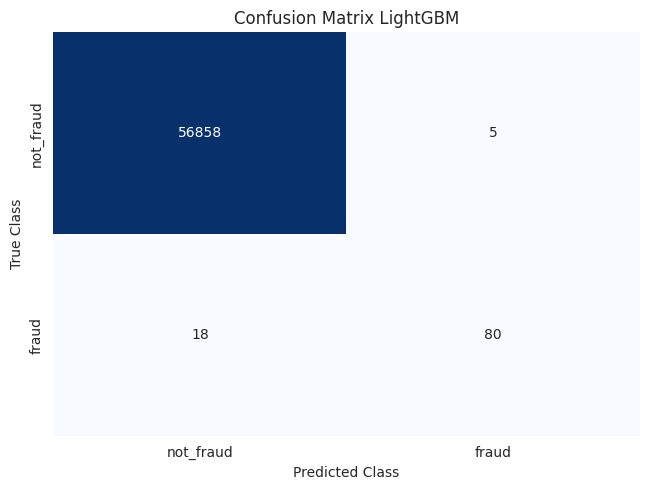

In [ ]:
# CM matrix
matrix_lgbm = confusion_matrix(original_ytest, y_pred_lgbm)
cm_lgbm = pd.DataFrame(matrix_lgbm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_lgbm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix LightGBM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_lgbm_proba = LGBM_model.predict_proba(original_Xtest)[::,1]
fpr_lgbm, tpr_lgbm, _ = metrics.roc_curve(original_ytest, y_pred_lgbm_proba)
auc_lgbm = metrics.roc_auc_score(original_ytest, y_pred_lgbm_proba)
print("AUC LightGBM :", auc_lgbm)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AUC LightGBM : 0.972487938249003


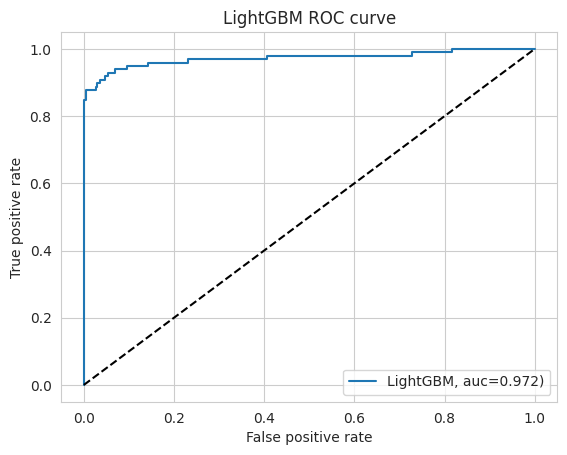

In [ ]:
# ROC
plt.plot(fpr_lgbm,tpr_lgbm,label=f"LightGBM, auc={auc_lgbm:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LightGBM ROC curve')
plt.legend(loc=4)
plt.show()

# MLP

In [ ]:
# Train the model
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=729)
mlp = MLP_model.fit(original_Xtrain, original_ytrain)

mlp.get_params(deep=True)

y_pred_mlp = mlp .predict(original_Xtest)

In [ ]:
# Scores
mlp_acc_test = metrics.accuracy_score(original_ytest, y_pred_mlp)
mlp_precision_test = metrics.precision_score(original_ytest, y_pred_mlp)
mlp_recall_test = metrics.recall_score(original_ytest, y_pred_mlp)
mlp_f1_test = metrics.f1_score(original_ytest, y_pred_mlp)

print("Accuracy MLP:",metrics.accuracy_score(original_ytest, y_pred_mlp))
print("Precision MLP:",metrics.precision_score(original_ytest, y_pred_mlp))
print("Recall MLP:",metrics.recall_score(original_ytest, y_pred_mlp))
print("F1 Score MLP:",metrics.f1_score(original_ytest, y_pred_mlp))

add_model_eval('MLP',mlp_acc_test, mlp_precision_test, mlp_recall_test, mlp_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy MLP: 0.999490879724724
Precision MLP: 0.8709677419354839
Recall MLP: 0.826530612244898
F1 Score MLP: 0.8481675392670157


,model,acc_test,precision_test,recall_test,f1_score_test
0,MLP,1.00,0.87,0.83,0.85
1,LightGBM,1.00,0.94,0.82,0.87
2,Random Forest,1.00,0.94,0.81,0.87
3,XGBoost,1.00,0.95,0.81,0.87
4,Logistic Regression,1.00,0.89,0.71,0.79
5,SVM,1.00,0.92,0.68,0.78


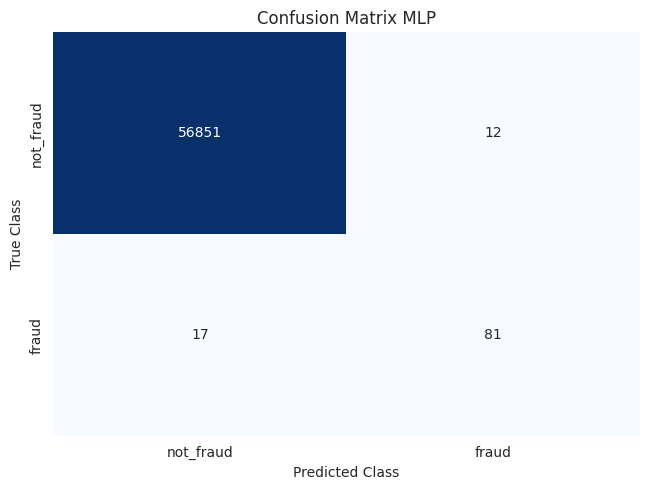

In [ ]:
# CM matrix
matrix_mlp = confusion_matrix(original_ytest, y_pred_mlp)
cm_mlp = pd.DataFrame(matrix_mlp, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_mlp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_mlp_proba = mlp.predict_proba(original_Xtest)[::,1]
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(original_ytest,  y_pred_mlp_proba)
auc_mlp = metrics.roc_auc_score(original_ytest, y_pred_mlp_proba)
print("AUC MLP :", auc_mlp)

AUC MLP : 0.9845597384619745


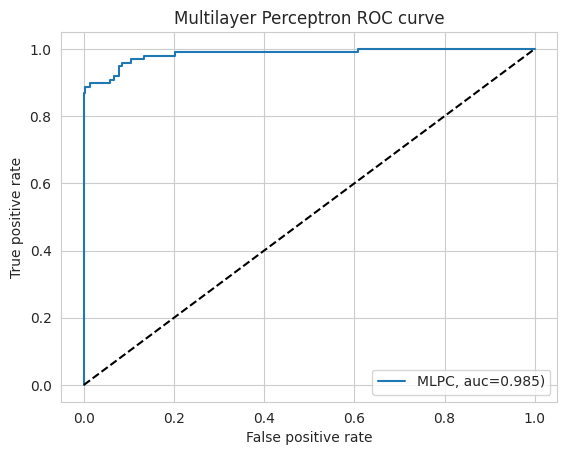

In [ ]:
# ROC
plt.plot(fpr_mlp,tpr_mlp,label=f"MLPC, auc={auc_mlp:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Multilayer Perceptron ROC curve')
plt.legend(loc=4)
plt.show()

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth = 2)
tree_model.fit(original_Xtrain, original_ytrain)

tree_y_pred = tree_model.predict(original_Xtest)

In [ ]:
# Scores
dctree_acc_test = metrics.accuracy_score(original_ytest, tree_y_pred)
dctree_precision_test = metrics.precision_score(original_ytest, tree_y_pred)
dctree_recall_test = metrics.recall_score(original_ytest, tree_y_pred)
dctree_f1_test = metrics.f1_score(original_ytest, tree_y_pred)

print("Accuracy DCtree:",metrics.accuracy_score(original_ytest, tree_y_pred))
print("Precision DCtree:",metrics.precision_score(original_ytest, tree_y_pred))
print("Recall DCtree:",metrics.recall_score(original_ytest, tree_y_pred))
print("F1 Score DCtree:",metrics.f1_score(original_ytest, tree_y_pred))

add_model_eval('Decision tree',dctree_acc_test, dctree_precision_test, dctree_recall_test, dctree_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy DCtree: 0.999280209265989
Precision DCtree: 0.8
Recall DCtree: 0.7755102040816326
F1 Score DCtree: 0.7875647668393783


,model,acc_test,precision_test,recall_test,f1_score_test
0,MLP,1.00,0.87,0.83,0.85
1,LightGBM,1.00,0.94,0.82,0.87
2,Random Forest,1.00,0.94,0.81,0.87
3,XGBoost,1.00,0.95,0.81,0.87
4,Decision tree,1.00,0.80,0.78,0.79
5,Logistic Regression,1.00,0.89,0.71,0.79
6,SVM,1.00,0.92,0.68,0.78


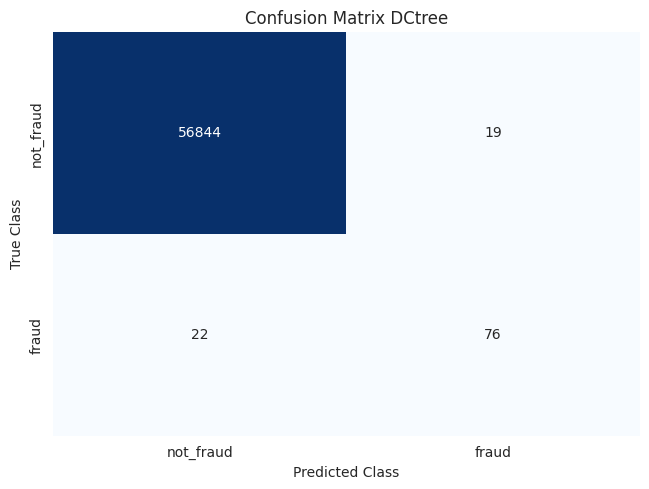

In [ ]:
# CM matrix
matrix_DCt = confusion_matrix(original_ytest, tree_y_pred)
cm_DCt = pd.DataFrame(matrix_DCt, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_DCt, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix DCtree"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_tree_proba = tree_model.predict_proba(original_Xtest)[::,1]
fpr_tree, tpr_tree, _ = metrics.roc_curve(original_ytest,  y_pred_tree_proba)
auc_tree = metrics.roc_auc_score(original_ytest, y_pred_tree_proba)
print("AUC DCtree :", auc_tree)

AUC DCtree : 0.8875750236784653


AUC DCtree : 0.8875750236784653


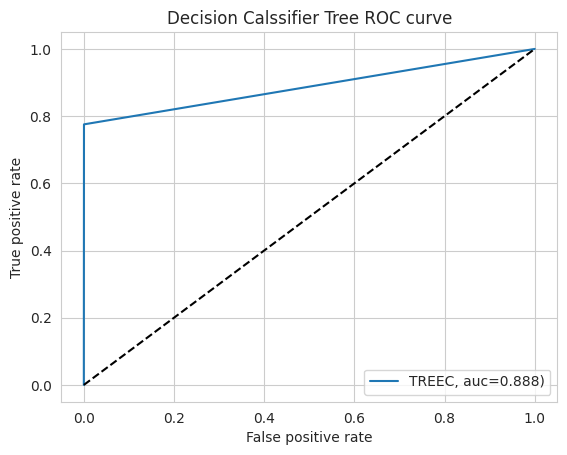

In [ ]:
# AUC
y_pred_tree_proba = tree_model.predict_proba(original_Xtest)[::,1]
fpr_tree, tpr_tree, _ = metrics.roc_curve(original_ytest,  y_pred_tree_proba)
auc_tree = metrics.roc_auc_score(original_ytest, y_pred_tree_proba)
print("AUC DCtree :", auc_tree)

# ROC
plt.plot(fpr_tree,tpr_tree,label=f"TREEC, auc={auc_tree:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Calssifier Tree ROC curve')
plt.legend(loc=4)
plt.show()

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=rs)
ada_model.fit(original_Xtrain, original_ytrain)

ada_y_pred = ada_model.predict(original_Xtest)

In [ ]:
# Scores
ada_acc_test = metrics.accuracy_score(original_ytest, ada_y_pred)
ada_precision_test = metrics.precision_score(original_ytest,ada_y_pred)
ada_recall_test = metrics.recall_score(original_ytest, ada_y_pred)
ada_f1_test = metrics.f1_score(original_ytest, ada_y_pred)

print("Accuracy ada:",metrics.accuracy_score(original_ytest, ada_y_pred))
print("Precision ada:",metrics.precision_score(original_ytest, ada_y_pred))
print("Recall ada:",metrics.recall_score(original_ytest, ada_y_pred))
print("F1 Score ada:",metrics.f1_score(original_ytest, ada_y_pred))

add_model_eval('AdaBoost',ada_acc_test, ada_precision_test, ada_recall_test,ada_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy ada: 0.999350432752234
Precision ada: 0.8351648351648352
Recall ada: 0.7755102040816326
F1 Score ada: 0.8042328042328042


,model,acc_test,precision_test,recall_test,f1_score_test
0,MLP,1.00,0.87,0.83,0.85
1,LightGBM,1.00,0.94,0.82,0.87
2,Random Forest,1.00,0.94,0.81,0.87
3,XGBoost,1.00,0.95,0.81,0.87
4,Decision tree,1.00,0.80,0.78,0.79
5,AdaBoost,1.00,0.84,0.78,0.80
6,Logistic Regression,1.00,0.89,0.71,0.79
7,SVM,1.00,0.92,0.68,0.78


AUC adaboost : 0.9742320155820272


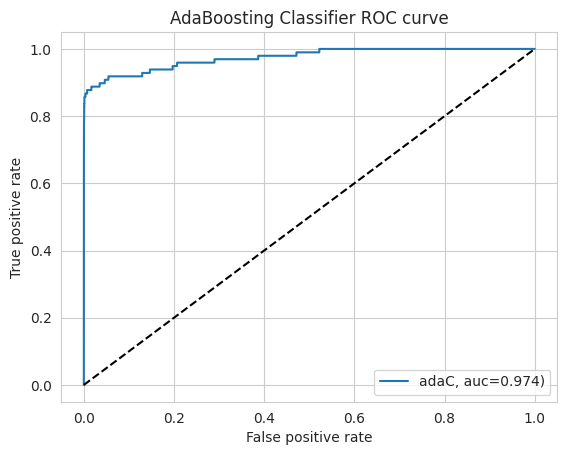

In [ ]:
# AUC
y_pred_ada_proba =ada_model.predict_proba(original_Xtest)[::,1]
fpr_ada, tpr_ada, _ = metrics.roc_curve(original_ytest,  y_pred_ada_proba)
auc_ada = metrics.roc_auc_score(original_ytest, y_pred_ada_proba)
print("AUC adaboost :", auc_ada)

# ROC
plt.plot(fpr_ada,tpr_ada,label=f"adaC, auc={auc_ada:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoosting Classifier ROC curve')
plt.legend(loc=4)
plt.show()

# GradientBoosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=rs)
gb_model.fit(original_Xtrain, original_ytrain)

gb_y_pred = gb_model.predict(original_Xtest)

In [ ]:
# Scores
gb_acc_test = metrics.accuracy_score(original_ytest, gb_y_pred)
gb_precision_test = metrics.precision_score(original_ytest,gb_y_pred)
gb_recall_test = metrics.recall_score(original_ytest, gb_y_pred)
gb_f1_test = metrics.f1_score(original_ytest, gb_y_pred)

print("Accuracy gb:",metrics.accuracy_score(original_ytest, gb_y_pred))
print("Precision gb:",metrics.precision_score(original_ytest, gb_y_pred))
print("Recall gb:",metrics.recall_score(original_ytest, gb_y_pred))
print("F1 Score gb:",metrics.f1_score(original_ytest, gb_y_pred))

add_model_eval('Gradient Boost',gb_acc_test, gb_precision_test, gb_recall_test,gb_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy gb: 0.9983848598163656
Precision gb: 0.625
Recall gb: 0.15306122448979592
F1 Score gb: 0.2459016393442623


,model,acc_test,precision_test,recall_test,f1_score_test
0,MLP,1.00,0.87,0.83,0.85
1,LightGBM,1.00,0.94,0.82,0.87
2,Random Forest,1.00,0.94,0.81,0.87
3,XGBoost,1.00,0.95,0.81,0.87
4,Decision tree,1.00,0.80,0.78,0.79
5,AdaBoost,1.00,0.84,0.78,0.80
6,Logistic Regression,1.00,0.89,0.71,0.79
7,SVM,1.00,0.92,0.68,0.78
8,Gradient Boost,1.00,0.62,0.15,0.25


AUC gradient : 0.27448114641456534


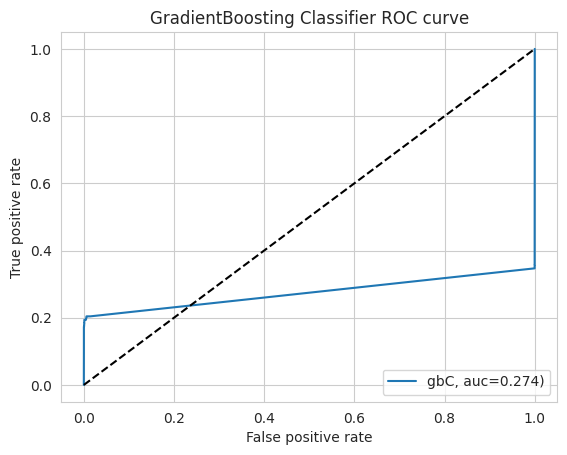

In [ ]:
# AUC
y_pred_gb_proba =gb_model.predict_proba(original_Xtest)[::,1]
fpr_gb, tpr_gb, _ = metrics.roc_curve(original_ytest,  y_pred_gb_proba)
auc_gb = metrics.roc_auc_score(original_ytest, y_pred_gb_proba)
print("AUC gradient :", auc_gb)

# ROC
plt.plot(fpr_gb,tpr_gb,label=f"gbC, auc={auc_gb:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting Classifier ROC curve')
plt.legend(loc=4)
plt.show()

# KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier()
kn_model.fit(original_Xtrain, original_ytrain)

kn_y_pred = kn_model.predict(original_Xtest)

In [ ]:
# Scores
kn_acc_test = metrics.accuracy_score(original_ytest, kn_y_pred)
kn_precision_test = metrics.precision_score(original_ytest,kn_y_pred)
kn_recall_test = metrics.recall_score(original_ytest, kn_y_pred)
kn_f1_test = metrics.f1_score(original_ytest, kn_y_pred)

print("Accuracy kn:",metrics.accuracy_score(original_ytest, kn_y_pred))
print("Precision kn:",metrics.precision_score(original_ytest, kn_y_pred))
print("Recall kn:",metrics.recall_score(original_ytest, kn_y_pred))
print("F1 Score kn:",metrics.f1_score(original_ytest, kn_y_pred))

add_model_eval('KNeighbors',kn_acc_test, kn_precision_test, kn_recall_test,kn_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy kn: 0.9994382121100402
Precision kn: 0.8837209302325582
Recall kn: 0.7755102040816326
F1 Score kn: 0.8260869565217391


,model,acc_test,precision_test,recall_test,f1_score_test
0,MLP,1.00,0.87,0.83,0.85
1,LightGBM,1.00,0.94,0.82,0.87
2,Random Forest,1.00,0.94,0.81,0.87
3,XGBoost,1.00,0.95,0.81,0.87
4,Decision tree,1.00,0.80,0.78,0.79
5,AdaBoost,1.00,0.84,0.78,0.80
6,KNeighbors,1.00,0.88,0.78,0.83
7,Logistic Regression,1.00,0.89,0.71,0.79
8,SVM,1.00,0.92,0.68,0.78
9,Gradient Boost,1.00,0.62,0.15,0.25


AUC gradient : 0.9233457465078078


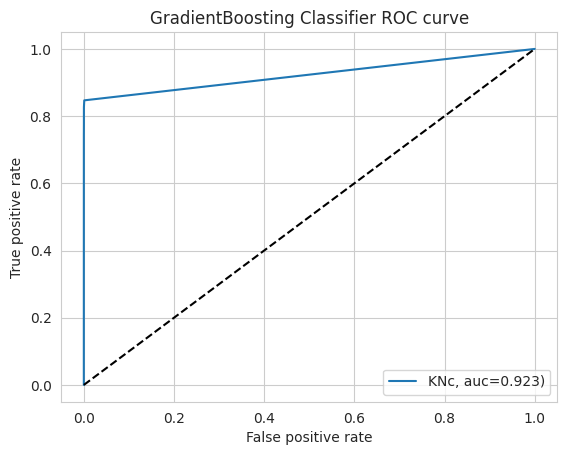

In [ ]:
# AUC
y_pred_kn_proba =kn_model.predict_proba(original_Xtest)[::,1]
fpr_kn, tpr_kn, _ = metrics.roc_curve(original_ytest,  y_pred_kn_proba)
auc_kn = metrics.roc_auc_score(original_ytest, y_pred_kn_proba)
print("AUC gradient :", auc_kn)

# ROC
plt.plot(fpr_kn,tpr_kn,label=f"KNc, auc={auc_kn:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting Classifier ROC curve')
plt.legend(loc=4)
plt.show()

# Neural Network

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import optimizers, metrics, callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(original_Xtrain.shape[-1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 256)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 53,901 (210.55 KB)

 Trainable params: 52,889 (206.60 KB)

 Non-trainable params: 1,012 (3.95 KB)

In [ ]:
#f1_score = tfa.metrics.F1Score(num_classes=1, average=None, threshold=0.8)

es = EarlyStopping(monitor='val_loss', patience=8, mode='min', verbose=1)

model.compile(optimizer=optimizers.Adam(1e-4),
              loss = "binary_crossentropy",
              metrics =  [metrics.Recall(name="recall"),
                          metrics.Precision(name="precision")])

In [ ]:
model1 = model.fit(original_Xtrain, original_ytrain, epochs = 10,
          validation_data=(original_Xval, original_yval),
          callbacks=[es])

Epoch 1/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 62s 10ms/step - loss: 0.5990 - precision: 0.0018 - recall: 0.3084 - val_loss: 0.0593 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 0.0497 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0110 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 0.0150 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0061 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 0.0113 - precision: 0.0714 - recall: 9.7939e-04 - val_loss: 0.0047 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - loss: 0.0101 - precision: 0.2402 - recall: 0.0157 - val_loss: 0.0035 - val_precision: 0.7778 - val_recall: 0.7975
Epoch 6/10
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - loss: 0.0090 - precision: 0.5048 - 

In [ ]:
# score = model.evaluate(original_Xtest, original_ytest, verbose=2)
# print(score)

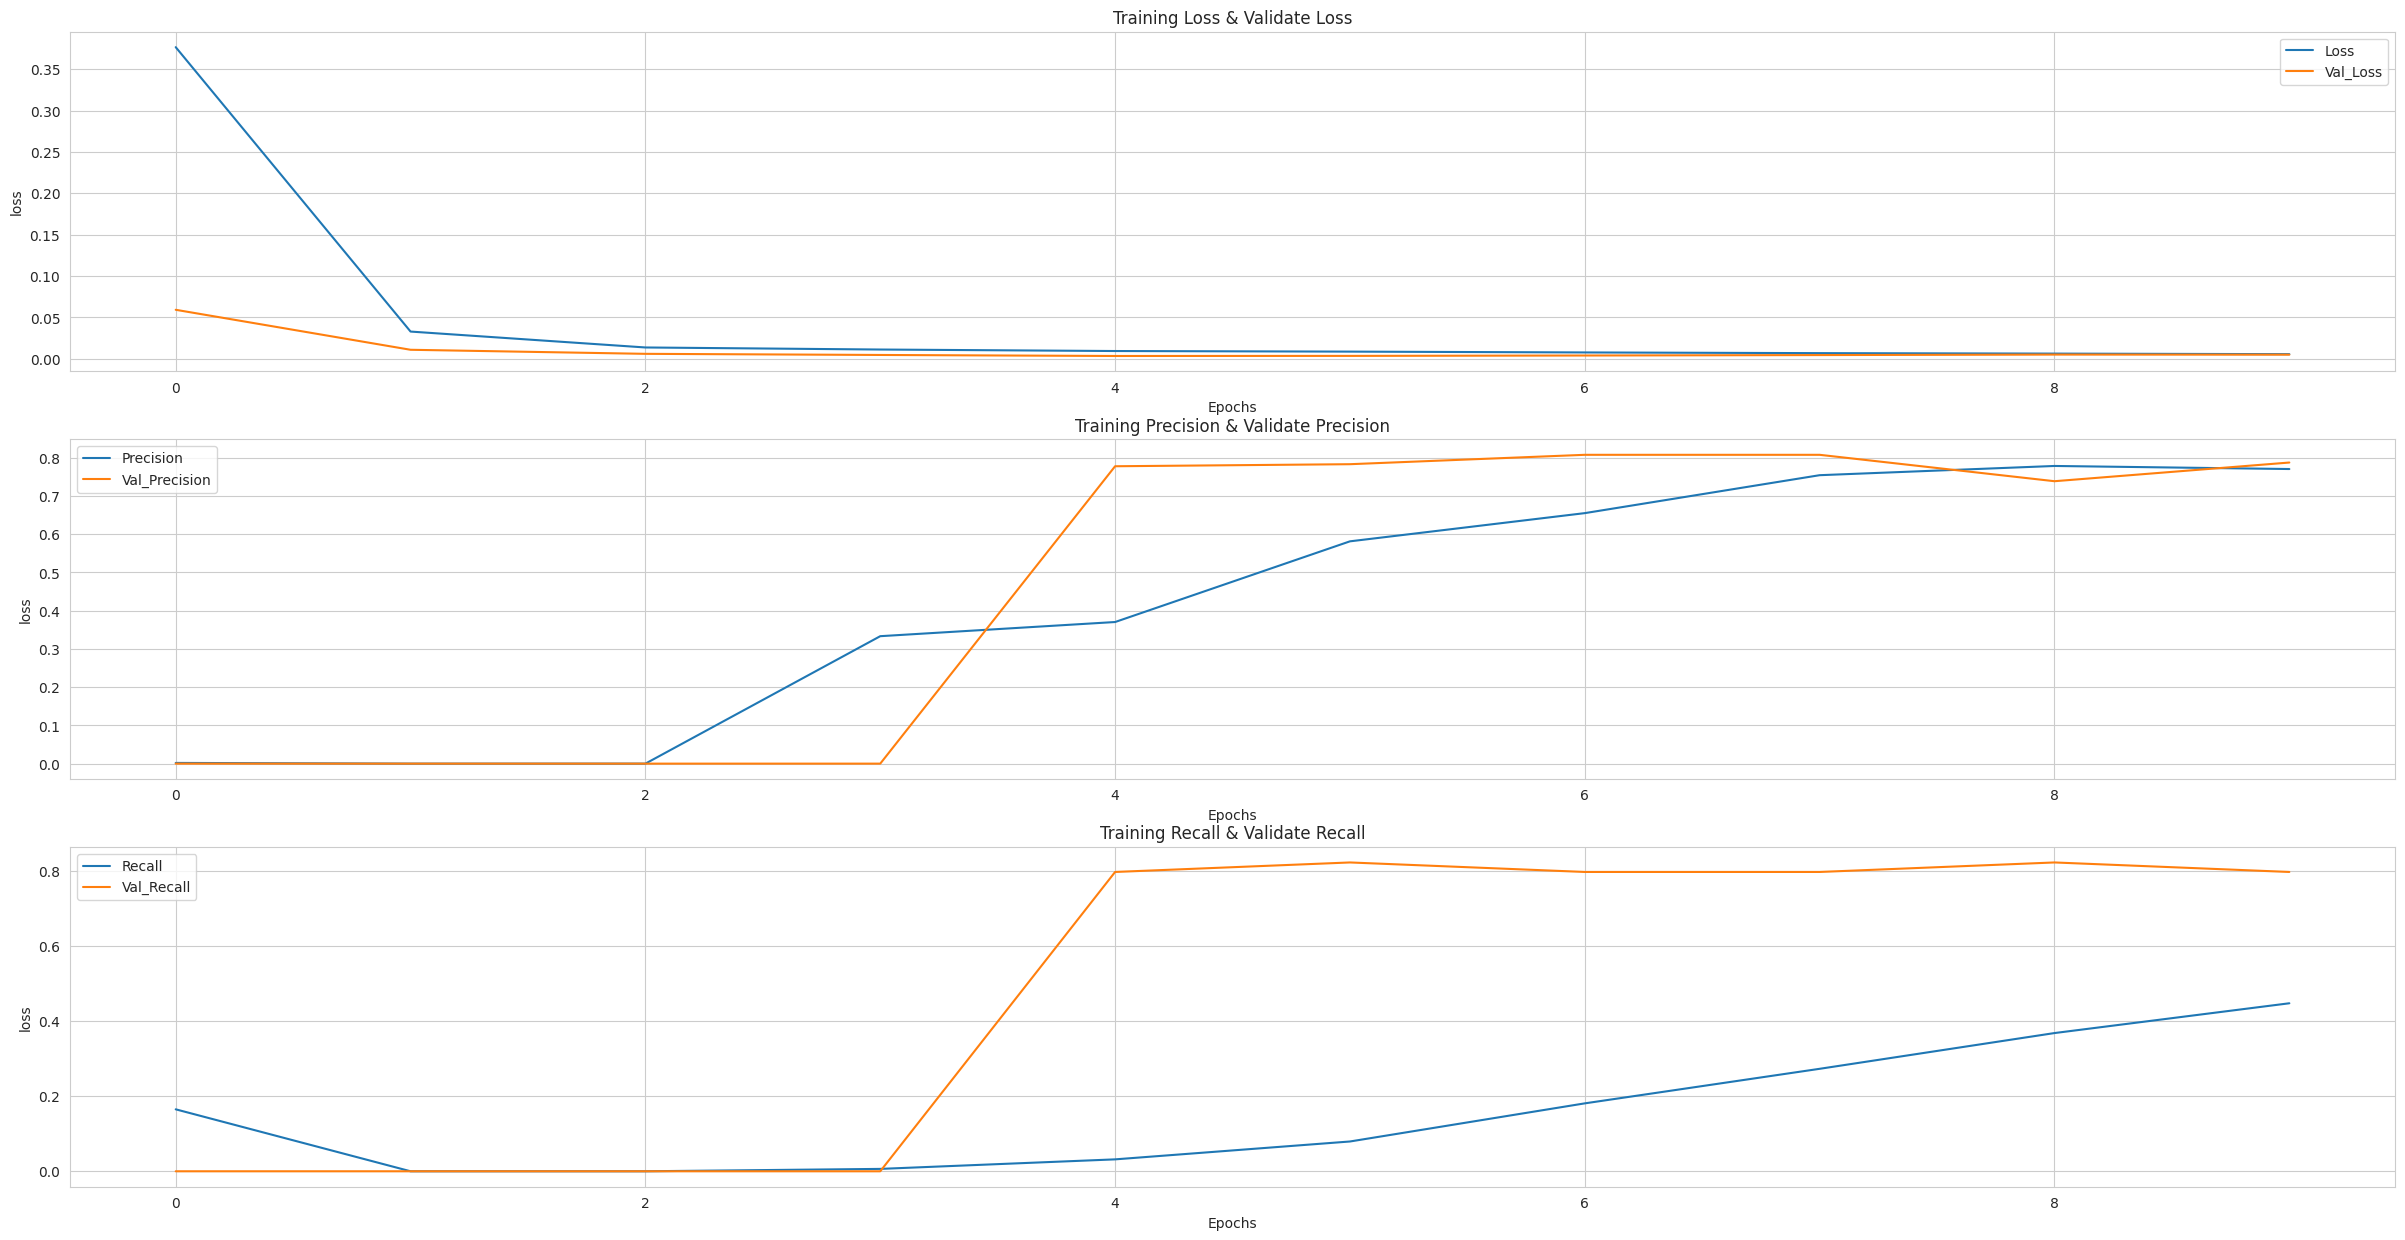

In [ ]:
plt.figure(figsize = (30,15))

plt.subplot(3,1,1)
plt.plot(model1.history["loss"], label = "Loss")
plt.plot(model1.history["val_loss"], label = "Val_Loss")
plt.title("Training Loss & Validate Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

plt.subplot(3,1,2)
plt.plot(model1.history["precision"], label = "Precision")
plt.plot(model1.history["val_precision"], label = "Val_Precision")
plt.title("Training Precision & Validate Precision")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

plt.subplot(3,1,3)
plt.plot(model1.history["recall"], label = "Recall")
plt.plot(model1.history["val_recall"], label = "Val_Recall")
plt.title("Training Recall & Validate Recall")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


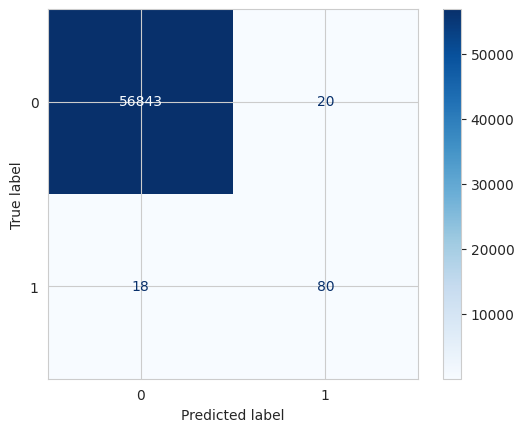


분류 보고서:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.80      0.82      0.81        98

    accuracy                           1.00     56961
   macro avg       0.90      0.91      0.90     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
y_pred_prob = model.predict(original_Xtest)
y_pred = (y_pred_prob > 0.8).astype(int)

# 컨퓨전 메트릭스 계산
cm = confusion_matrix(original_ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

class_report = classification_report(original_ytest, y_pred)
print("\n분류 보고서:")
print(class_report)

Length of y_test: 56961
Length of y_test_pred_binary: 56961


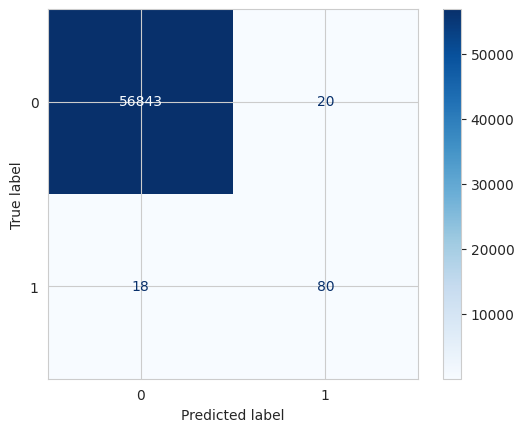


분류 보고서:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.80      0.82      0.81        98

    accuracy                           1.00     56961
   macro avg       0.90      0.91      0.90     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
# 이진 분류 임계값 설정
y_pred_down = (y_pred > 0.4).astype(int) # 재현율를 높이기 위해 예측값이 0.4 이상이면 이상거래로 예측

# 예측값과 실제 값의 길이 출력
print(f"Length of y_test: {len(original_ytest)}")
print(f"Length of y_test_pred_binary: {len(y_pred_down)}")

# 혼동 행렬 계산
cm2 = confusion_matrix(original_ytest, y_pred_down)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# 분류 보고서 생성
class_report = classification_report(original_ytest, y_pred_down)
print("\n분류 보고서:")
print(class_report)

In [ ]:
# 0.5 이상이면 1   아니면 0
nn_pred = model.predict(original_Xtest)
nn_pred = np.where(nn_pred.reshape(-1) > 0.5, 1., 0.)

nn_pred2 = (model.predict(original_Xtest).flatten() > 0.5).astype(int)

print("Test Report = \n", classification_report(nn_pred, original_ytest))
print("Test Report = \n", classification_report(nn_pred2, original_ytest))

ann_recall = recall_score(original_ytest, nn_pred)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Test Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56859
         1.0       0.82      0.78      0.80       102

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Test Report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.82      0.78      0.80       102

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
import sklearn.metrics as metrics
y_pred_ann = y_pred_down.copy()

# Scores
ann_acc_test = metrics.accuracy_score(original_ytest, y_pred_ann)
ann_precision_test = metrics.precision_score(original_ytest, y_pred_ann)
ann_recall_test = metrics.recall_score(original_ytest, y_pred_ann)
ann_f1_test = metrics.f1_score(original_ytest, y_pred_ann)

print("Accuracy ANN:",metrics.accuracy_score(original_ytest, y_pred_ann))
print("Precision ANN:",metrics.precision_score(original_ytest, y_pred_ann))
print("Recall ANN:",metrics.recall_score(original_ytest, y_pred_ann))
print("F1 Score ANN:",metrics.f1_score(original_ytest, y_pred_ann))

add_model_eval('ANN',ann_acc_test, ann_precision_test, ann_recall_test, ann_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy ANN: 0.9993328768806727
Precision ANN: 0.8
Recall ANN: 0.8163265306122449
F1 Score ANN: 0.8080808080808081


,model,acc_test,precision_test,recall_test,f1_score_test
0,MLP,1.00,0.87,0.83,0.85
1,LightGBM,1.00,0.94,0.82,0.87
2,ANN,1.00,0.80,0.82,0.81
3,ANN,1.00,0.80,0.82,0.81
4,Random Forest,1.00,0.94,0.81,0.87
5,XGBoost,1.00,0.95,0.81,0.87
6,Decision tree,1.00,0.80,0.78,0.79
7,AdaBoost,1.00,0.84,0.78,0.80
8,KNeighbors,1.00,0.88,0.78,0.83
9,Logistic Regression,1.00,0.89,0.71,0.79


# ANN 불균형처리

In [ ]:
# # 원본 데이터의 클래스 분포 기반 가중치 설정
# total_samples = len(df[df['Class']==1]) + len(df[df['Class']==0])
# weight_for_0 = total_samples / (2 *len(df[df['Class']==0]))
# weight_for_1 = total_samples / (2 * len(df[df['Class']==1]))

# class_weights = {0: weight_for_0, 1: weight_for_1}
# print(class_weights)

In [ ]:
# from tensorflow.keras import backend as K

# def focal_loss(gamma=2.0, alpha=0.25):
#     def focal_loss_fixed(y_true, y_pred):
#         y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1 - K.epsilon())
#         cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
#         weight = alpha * y_true * tf.math.pow(1 - y_pred, gamma) + (1 - alpha) * (1 - y_true) * tf.math.pow(y_pred, gamma)
#         loss = weight * cross_entropy
#         return tf.reduce_mean(loss)
#     return focal_loss_fixed

In [ ]:
# es = EarlyStopping(monitor='val_loss', patience=8, mode='min', verbose=1)
# rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, mode='min', verbose=1)

# model.compile(optimizer=optimizers.Adam(1e-4),
#               loss = focal_loss(gamma=2.0, alpha=0.25),
#               metrics =  [Recall(), Precision()])

In [ ]:
# model1 = model.fit(x_train_nn, y_train_nn, epochs = 10,
#           validation_data=(x_val, y_val),
#          callbacks=[es, rlrop],
#                    class_weight=class_weights)

In [ ]:
# plt.figure(figsize = (30,15))

# plt.subplot(3,1,1)
# plt.plot(model1.history["loss"], label = "Loss")
# plt.plot(model1.history["val_loss"], label = "Val_Loss")
# plt.title("Training Loss & Validate Loss")
# plt.xlabel("Epochs")
# plt.ylabel("loss")
# plt.legend()

# plt.subplot(3,1,2)
# plt.plot(model1.history["precision"], label = "Precision")
# plt.plot(model1.history["val_precision"], label = "Val_Precision")
# plt.title("Training Precision & Validate Precision")
# plt.xlabel("Epochs")
# plt.ylabel("loss")
# plt.legend()

# plt.subplot(3,1,3)
# plt.plot(model1.history["recall"], label = "Recall")
# plt.plot(model1.history["val_recall"], label = "Val_Recall")
# plt.title("Training Recall & Validate Recall")
# plt.xlabel("Epochs")
# plt.ylabel("loss")
# plt.legend()

In [ ]:
# # 예측값 계산
# y_pred_sig = model.predict(x_test)
# y_pred_sig = (y_pred_prob > 0.8).astype(int)

# # 컨퓨전 메트릭스 계산
# cm = confusion_matrix(y_test, y_pred_sig)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

In [ ]:
# # 예측값과 실제 값의 길이 출력
# print(f"Length of y_test: {len(y_test)}")
# print(f"Length of y_test_pred_binary: {len(y_pred_sig)}")

# # 혼동 행렬 계산
# cm2 = confusion_matrix(y_test, y_pred_sig)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
# disp.plot(cmap=plt.cm.Blues)
# plt.show()


# # 분류 보고서 생성
# class_report = classification_report(y_test, y_pred_sig)
# print("\n분류 보고서:")
# print(class_report)
# # f1-score 계산
# f1score = f1_score(y_test, y_pred_sig)
# print("\nf1-score 점수:")
# print(f1score)

In [ ]:
# from sklearn import metrics

# # Scores
# ann_acc_test = metrics.accuracy_score(y_test, y_pred_sig)
# ann_precision_test = metrics.precision_score(y_test, y_pred_sig)
# ann_recall_test = metrics.recall_score(y_test, y_pred_sig)
# ann_f1_test = metrics.f1_score(y_test, y_pred_sig)

# print("Accuracy ANN:",metrics.accuracy_score(y_test, y_pred_sig))
# print("Precision ANN:",metrics.precision_score(y_test, y_pred_sig))
# print("Recall ANN:",metrics.recall_score(y_test, y_pred_sig))
# print("F1 Score ANN:",metrics.f1_score(y_test, y_pred_sig))

# add_model_eval('ANN_sig',ann_acc_test, ann_precision_test, ann_recall_test, ann_f1_test)
# df_metrics_table = view_models_eval(df_metrics_table)
# display(df_metrics_table)

# 비교

In [ ]:
df_metrics_table2 = df_metrics_table.drop('acc_test', axis=1).drop_duplicates(keep='first').iloc[:-1]
df_metrics_table2

,model,precision_test,recall_test,f1_score_test
0,MLP,0.87,0.83,0.85
1,LightGBM,0.94,0.82,0.87
2,ANN,0.80,0.82,0.81
4,Random Forest,0.94,0.81,0.87
5,XGBoost,0.95,0.81,0.87
6,Decision tree,0.80,0.78,0.79
7,AdaBoost,0.84,0.78,0.80
8,KNeighbors,0.88,0.78,0.83
9,Logistic Regression,0.89,0.71,0.79
10,SVM,0.92,0.68,0.78


In [28]:
import pandas as pd

df_metrics_table2 = pd.DataFrame({
    'model': ['MLP', 'LightGBM', 'ANN', 'Random Forest', 'XGBoost', 'Decision Tree', 'AdaBoost', 'KNeighbors', 'Logistic Regression', 'SVM', 'Gradient Boost'],
    'precision_test': [0.87, 0.94, 0.8, 0.90, 0.95, 0.8, 0.84, 0.88, 0.89, 0.92, 0.62],
    'recall_test': [0.81, 0.82, 0.82, 0.80, 0.81, 0.78, 0.78, 0.78, 0.71, 0.68, 0.15],
    'f1_score_test': [0.84, 0.87, 0.81, 0.85, 0.87, 0.79, 0.8, 0.83, 0.79, 0.78, 0.25]
})

df_metrics_table2


,model,precision_test,recall_test,f1_score_test
0,MLP,0.87,0.81,0.84
1,LightGBM,0.94,0.82,0.87
2,ANN,0.80,0.82,0.81
3,Random Forest,0.90,0.80,0.85
4,XGBoost,0.95,0.81,0.87
5,Decision Tree,0.80,0.78,0.79
6,AdaBoost,0.84,0.78,0.80
7,KNeighbors,0.88,0.78,0.83
8,Logistic Regression,0.89,0.71,0.79
9,SVM,0.92,0.68,0.78


In [29]:
metrics_table = df_metrics_table2.melt(id_vars='model', value_vars=['precision_test','recall_test','f1_score_test'], value_name='score', var_name='metric')
metrics_table.head()

,model,metric,score
0,MLP,precision_test,0.87
1,LightGBM,precision_test,0.94
2,ANN,precision_test,0.80
3,Random Forest,precision_test,0.90
4,XGBoost,precision_test,0.95


In [36]:
metrics_table = metrics_table.sort_values(by='score')

In [37]:
# metrics_table = metrics_table[
#     (metrics_table['model'] != 'GaussianNB') | (metrics_table['metric'] != 'precision_test')
# ]
# metrics_table.head()

In [38]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

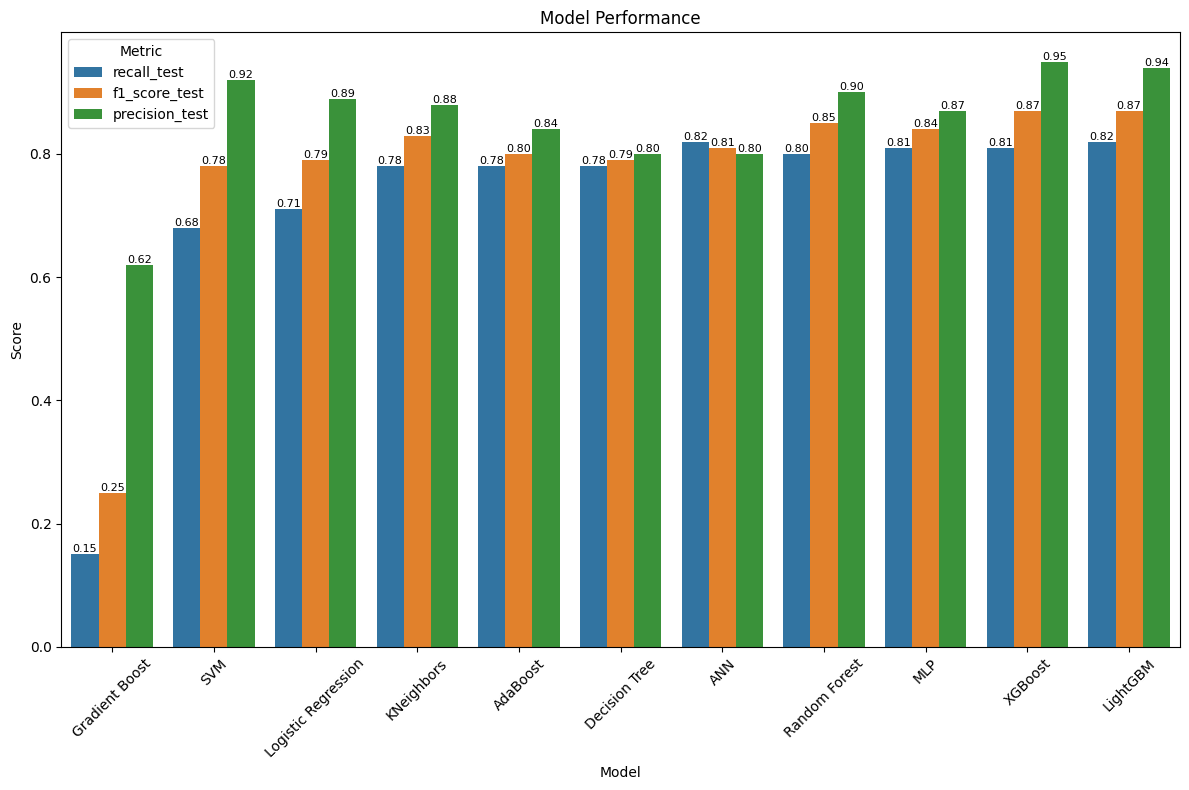

In [39]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="model", y="score", hue='metric', data=metrics_table)

plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
for con in ax.containers:
  ax.bar_label(con, fmt='%.2f',label_type='edge', fontsize=8)
plt.tight_layout()
plt.show()

In [40]:
# recall_df = pd.DataFrame({'recall' : [logit_recall,
#                                       ann_recall,
#                                       recall_xgb,
#                                       lgbm_recall,
#                                       recall_rf,
#                                       svc_recall,
#                                       ],
#                           'model' : ['Logistic','ANN','XGBoost','LightGBM','RandomForest','Support Vector Machine']})
# re_vals = recall_df['recall']
# ind = np.arange(recall_df.shape[0])
# width = 0.5
# colors = ['b', 'g', 'r']

# def autolabel(bars):
#     for bar in bars:
#         width = bar.get_width()
#         ax.text(width*0.95, bar.get_y() + bar.get_height()/2,
#                 '%f' % float(width),
#                 ha='right', va='center')

# # make the plots
# fig, ax = plt.subplots()
# a = ax.barh(ind, re_vals, width, color = colors) # plot a vals
# ax.set_yticks(ind)  # position axis ticks
# ax.set_yticklabels(recall_df.model)  # set them to the names
# autolabel(a)
# plt.title("Recall Score")
# plt.show()

In [ ]:
# 1. SMOTE 적용: 불균형 데이터셋에 SMOTE를 적용해 레이블 불균형(사기 거래보다 정상 거래가 더 많음)을 해결함.
# 2. 모델 성능 차이: 오버 샘플링된 데이터셋에서 신경망이 무작위 언더샘플링 데이터셋을 사용하는 모델 보다 사기 거래를 올바르게 예측하는 경우가 적었음.
# 3. 이상치 제거: 무작위 언더샘플링 데이터셋에서만 이상치 제거가 구현 되었고, 오버샘플링된 데이터셋에서는 구현되지 않았음
# 4. 정상 거래 오탐지: 언더샘플링 데이터에서는 많은 정상 거래를 사기 거래로 잘못 분류하는 문제가 발생함. 이는 고객 불만과 금융 기관의 단점으로 어이질 수 있음.
# 5. 데이터 셔플링: 데이터 셔플링을 구현했기 때문에 예측과 정확도가 변동될 수 있음.

In [50]:
print('XGboost Classifier:')

print('Precision XGB:', round(0.9518072289156626,3))
print('Recall XGB:',  round(0.8061224489795918,3))
print('F1 Score XGB:',  round(0.8729281767955801,3))
print()
print('LightGBM Classifier:')

print('Precision LGBM:',  round(0.9411764705882353,3))
print('Recall LGBM:',  round(0.8163265306122449,3))
print('F1 Score LGBM:',  round(0.8743169398907104,3))

XGboost Classifier:
Precision XGB: 0.952
Recall XGB: 0.806
F1 Score XGB: 0.873

LightGBM Classifier:
Precision LGBM: 0.941
Recall LGBM: 0.816
F1 Score LGBM: 0.874
